# Sommaire

**Partie 1 : Préparation**

 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Création de fonction</a>

**Partie 2 : Import et nettoyage**

 - <a href="#C3">Fichier erp.xlsx</a>
 - <a href="#C4">Fichier web.xlsx</a>
 - <a href="#C5">Fichier liaison.xlsx</a>

**Partie 3 : Jointure des données**

 - <a href="#C6">Jointure des tables</a>

**Partie 4 : Calcul du chiffre d'affaires**

 - <a href="#C7">Chiffre d'affaires</a>


**Partie 5 : Analyse des prix et du chiffre d'affaires**

 - <a href="#C8">Analyse sur les prix</a>
 - <a href="#C9">Analyse du chiffre d'affaires</a>

**Partie 6 : Etude complémentaire**

 - <a href="#C10">Étude complémentaire</a>


**Résumé**

 - <a href="#C11">Résumé</a>



# <a name="C1">Importation des librairies</a>
On importe les différentes librairies :
- `pandas` pour les manipulations et l'analyse des données
- `numpy` pour réaliser des calculs sur des tableaux ou des matrices
- `matplotlib` pour tracer ou visualiser les données sous forme de graphique
- `datetime` pour gérer les formats de date et de temps
- `scipy.stats` pour avoir les fonctions statistiques et de probabilité
- `display` pour afficher toutes les colonnes des dataframes
- `plotly` pour tracer ou visualiser les données sous forme de graphique de manière esthétique


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
from IPython.display import display
import plotly.express as px

# <a name="C2">Création de fonction</a>

On crée une fonction pour analyser les data Frames et récupérer le résultat de l'analyse. Cette fonction va nous permettre d'afficher les informations suivantes en une ligne de commande :
- le type de chaque variable 
- le nombre de valeur
- le nombre de valeur unique
- la liste des valeurs uniques 
- le nombre de valeur manquante
- le pourcentage de valeur manquante
- pour le type objet, l'une des valeurs ou la valeur la plus représentée et sa fréquence d'apparition 
- pour les types numériques et date, la valeur moyenne, minimum, les percentiles, la valeur maximale et l'écart-type standard

In [3]:
# Fonction

def analyser_data_frame(data_frame):
    "Cette fonction nous donne, \
    pour chaque variable d'un data frame, \
    - le type de chaque variable ; \
    - le nombre de valeurs ; \
    - le nombre de valeurs unique ; \
    - la liste des valeurs unique ; \
    - le nombre de valeurs manquantes ; \
    - le pourcentage de valeurs manquantes ; \
    - pour le type objet, l'une des valeurs ou la valeur la plus réprésentée et sa fréquence d'apparition ; \
    - pour les types numérique et date, la valeur moyenne, minimum, les percentiles, la valeur maximale et l'écart-type standard"
    
    # Récupérer le nombre de colonne du data frame à analyser
    nombre_de_colonne = data_frame.shape[1]
    
    # Création du data frame "analyse" pour récupérer les résultats d'analyse
    data_frame_analyse = pd.DataFrame(columns=data_frame.columns, 
                                      index = ['type','nb_valeur','nb_valeur_unique',
                                               'liste_valeur_unique','valeur_manquante',
                                               'valeur_manquante_%'])
    
    
    
    for i in range(nombre_de_colonne):
        
         # affichage du type de chaque variable
        data_frame_analyse.iloc[0,i] = data_frame.iloc[:,i].dtypes
        
        # Calculer le nombre de valeur
        data_frame_analyse.iloc[1,i] = data_frame.iloc[:,i].count()
        
        # calcul du nombre de valeurs unique
        data_frame_analyse.iloc[2,i] = len(pd.unique(data_frame.iloc[:,i]))
        
        # récupérer liste des valeurs unique 
        data_frame_analyse.iloc[3,i] = pd.unique(data_frame.iloc[:,i])
        
        # calcul du nombre de valeurs manquantes
        data_frame_analyse.iloc[4,i] = data_frame.iloc[:,i].isnull().sum()
        
        # calcul du pourcentage de valeurs manquantes
        data_frame_analyse.iloc[5,i] = round(data_frame_analyse.iloc[4,i] * 100 / len(data_frame.iloc[:,i]),1)
        
    
    # Ajouter le retour de la fonction *describe()* dans le dataframe
    data_frame_analyse = pd.concat([data_frame_analyse,pd.DataFrame(data_frame.describe(include='all',datetime_is_numeric=True))])
    
    # Supprimer les lignes 'count' et 'unique' importer de la fonction *describe()* qui font doublons
    # tester si ces lignes sont dans le data frame
    
    #data_frame_analyse = data_frame_analyse.drop(index=['count','unique'])
    
    # rajouter le nombre de caractère moyen, min et max 
    
    
    return data_frame_analyse
    
    
#####

# <a name="C3">Fichier erp.xlsx</a>

Ce fichier provient du logiciel ERP

## Import du fichier erp.xlsx

On importe le fichier excel `erp.xlsx`

In [4]:
data_erp = pd.read_excel('Data xlsx/erp.xlsx')
data_erp.head()

/Users/damien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock
1        3849           1   34.3               0   outofstock
2        3850           1   20.8               0   outofstock
3        4032           1   14.1               0   outofstock
4        4039           1   46.0               0   outofstock

On affiche la taille du data frame

In [5]:
data_erp.shape

(825, 5)

On réalise une analyse du data frame

In [6]:
analyser_data_frame(data_erp)

product_id  \
type                                                             int64   
nb_valeur                                                          825   
nb_valeur_unique                                                   825   
liste_valeur_unique  [3847, 3849, 3850, 4032, 4039, 4040, 4041, 404...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            825.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                       5162.597576   
std                                                         902.644635   
min                                                             3847.0   
25%                                                             4348.0   
50%                                                             4907.0   
75%                                                             5805.0   
max                                                             7338.0   

                    onsale_web  \
type                     int64   
nb_valeur                  825   
nb_valeur_unique             2   
liste_valeur_unique     [1, 0]   
valeur_manquante             0   
valeur_manquante_%         0.0   
count                    825.0   
unique                     NaN   
top                        NaN   
freq                       NaN   
mean                  0.869091   
std                   0.337506   
min                        0.0   
25%                        1.0   
50%                        1.0   
75%                        1.0   
max                        1.0   

                                                                 price  \
type                                                           float64   
nb_valeur                                                          825   
nb_valeur_unique                                                   381   
liste_valeur_unique  [24.2, 34.3, 20.8, 14.1, 46.0, 32.7, 31.2, 60....   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            825.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                         32.415636   
std                                                          26.795849   
min                                                                5.2   
25%                                                               14.6   
50%                                                               24.4   
75%                                                               42.0   
max                                                              225.0   

                                                        stock_quantity  \
type                                                             int64   
nb_valeur                                                          825   
nb_valeur_unique                                                   128   
liste_valeur_unique  [0, 15, 34, 12, 66, 36, 22, 46, 41, 35, 16, 11...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            825.0   
unique                                                             NaN   
top                                                                NaN   
freq                                     

Ce jeu de données est issu de l'ERP. Il contient les identifiants des produits, leur prix ainsi que les infos sur le stock. Il y a 825 lignes de produits et 5 variables :
- **product_id**, l'identifiant des produits ;
- **onsale_web**, pour savoir si le produit est en vente sur le site web ou pas (peut être remplacé par un booléen) ;
- **price**, le prix du produit ; 
- **stock_quantity**, la quantité en stock ;
- **stock_status**, l'état du stock est fonction de la variable **stock_quantity** (si **stock_quantity** = 0, alors **stock_status** vaut "outofstock", sinon **stock_status** vaut "instock"). Cette variable n'est pas importante pour car l'information est disponible avec la variable **stock_quantity**

## Suppression des variables inutiles

la variable **stock_status** était dépendante de la variable **stock_quantity**, on peut donc supprimer la variable **stock_status** et utiliser la variable **stock_quantity** pour avoir l'information

In [7]:
data_erp = data_erp.drop(columns=['stock_status'])

data_erp.head()

product_id  onsale_web  price  stock_quantity
0        3847           1   24.2               0
1        3849           1   34.3               0
2        3850           1   20.8               0
3        4032           1   14.1               0
4        4039           1   46.0               0

## Valeurs manquantes

Il n'y a aucune valeur manquante dans ce jeu de données.

## Erreur de type

La variable onsale_web est de type int64. Elle est utilisée pour savoir si le produit est en vente sur le site web. Elle peut être remplacé par un type *booléen*. Depuis la version 2.4 de Python, les booléens sont une sous-classe des *int*. On va le laisser comme ça, car  c'est plus facile d'utiliser des *int* dans les calculs arithmétiques.

Pour ce data frame c'est ok.

## Doublons

On va rechercher les doublons dans ce data frame. On va se concentrer sur la variable **product_id**, car c'est un identifiant.

In [8]:
data_erp[data_erp['product_id'].duplicated(keep=False)]

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity]
Index: []

Aucun doublon existe dans ce data frame.

## Détection d'outliers

Pour les deux premières colonnes, il n'y a rien d'anormal. La première colonne, c'est l'identifiant du produit et la seconde doit varier entre zéro et un.

Les prix sont compris entre 5,2 et 225 €. Rien d'inquiétant là-dedans. La quantité en stock va de zéro à 578. On regardera ça un peu plus dans le détails après la jointure des tables.

# <a name="C4">Fichier web.xlxs</a>

## import du fichier web.xlsx

On importe le fichier excel `web.xlsx`.


In [9]:
data_web = pd.read_excel('Data xlsx/web.xlsx')

# Afficher toutes les colonnes
pd.options.display.max_columns = None

data_web.head()

/Users/damien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


sku  virtual  downloadable  rating_count  average_rating  \
0  bon-cadeau-25-euros        0             0             0             0.0   
1                15298        0             0             0             0.0   
2                15296        0             0             0             0.0   
3                15300        0             0             0             0.0   
4                19814        0             0             0             0.0   

   total_sales tax_status  tax_class  post_author           post_date  \
0         10.0    taxable        NaN          1.0 2018-06-01 13:53:46   
1          6.0    taxable        NaN          2.0 2018-02-08 12:58:52   
2          0.0    taxable        NaN          2.0 2018-02-08 13:49:41   
3          0.0    taxable        NaN          2.0 2018-02-08 14:08:36   
4          3.0    taxable        NaN          2.0 2018-02-09 14:01:05   

        post_date_gmt  post_content  \
0 2018-06-01 11:53:46           NaN   
1 2018-02-08 11:58:52           NaN   
2 2018-02-08 12:49:41           NaN   
3 2018-02-08 13:08:36           NaN   
4 2018-02-09 13:01:05           NaN   

                                          post_title  \
0                                  Bon cadeau de 25€   
1        Pierre Jean Villa Saint-Joseph Préface 2018   
2    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   

                                        post_excerpt post_status  \
0  <span style="color: #a85253;"><strong>Parlons ...     publish   
1  Il exhale un nez subtil, racé avec du poivre f...     publish   
2  Les vieilles vignes lui apportent une rare pro...     publish   
3  Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
4  Gamine représente tout le fruité et la gourman...     publish   

  comment_status ping_status  post_password  \
0         closed      closed            NaN   
1         closed      closed            NaN   
2         closed      closed            NaN   
3         closed      closed            NaN   
4         closed      closed            NaN   

                                           post_name       post_modified  \
0                             bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   

    post_modified_gmt  post_content_filtered  post_parent  \
0 2018-06-01 12:13:57                    NaN          0.0   
1 2019-12-30 08:30:29                    NaN          0.0   
2 2019-12-21 08:00:17                    NaN          0.0   
3 2020-06-26 16:15:03                    NaN          0.0   
4 2020-01-04 15:36:01                    NaN          0.0   

                                                guid  menu_order post_type  \
0  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
1  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
2  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
3  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
4  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

  post_mime_type  comment_count  
0            NaN            0.0  
1            NaN            0.0  
2            NaN            0.0  
3            NaN            0.0  
4            NaN            0.0

On affiche la taille du data frame.

In [10]:
data_web.shape

(1513, 28)

On fait une analyse du data frame.

In [11]:
analyser_data_frame(data_web)

sku  \
type                                                            object   
nb_valeur                                                         1428   
nb_valeur_unique                                                   715   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                    85   
valeur_manquante_%                                                 5.6   
count                                                             1428   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 2   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                    virtual downloadable rating_count average_rating  \
type                  int64        int64        int64        float64   
nb_valeur              1513         1513         1513           1430   
nb_valeur_unique          1            1            1              2   
liste_valeur_unique     [0]          [0]          [0]     [0.0, nan]   
valeur_manquante          0            0            0             83   
valeur_manquante_%      0.0          0.0          0.0            5.5   
count                1513.0       1513.0       1513.0         1430.0   
unique                  NaN          NaN          NaN            NaN   
top                     NaN          NaN          NaN            NaN   
freq                    NaN          NaN          NaN            NaN   
mean                    0.0          0.0          0.0            0.0   
min                     0.0          0.0          0.0            0.0   
25%                     0.0          0.0          0.0            0.0   
50%                     0.0          0.0          0.0            0.0   
75%                     0.0          0.0          0.0            0.0   
max                     0.0          0.0          0.0            0.0   
std                     0.0          0.0          0.0            0.0   

                                                           total_sales  \
type                                                           float64   
nb_valeur                                                         1430   
nb_valeur_unique                                                    42   
liste_valeur_unique  [10.0, 6.0, 0.0, 3.0, 7.0, 14.0, 1.0, 23.0, 18...   
valeur_manquante                                                    83   
valeur_manquante_%                                                 5.5   
count                                                           1430.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.006993   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.510559   

                         tax_status tax_class      post_author  \
type                         object   

Ce jeu de données sont les posts d'article en vente sur le site Internet. Il y a 1513 post et 28 variables :
- **sku**, c'est l'identifiant web, celui que l'on retrouve dans le data frame *liaison*, toutefois le nombre de valeurs unique ne correspond pas avec celui de la table liaison et il manque des valeurs ; 
- **virtual**, **downloadable**, **rating_count** et **average_rating** sont à `0` ou `NaN`, on va pouvoir les supprimer, car il n'y a aucune information à exploiter.
- **total_sales**, le nombre de vente des produits ;
- **tax_status** et **tax_class**, des informations relatives à la TVA, ces variables n'ont pas l'air d'être utilisées, on va pouvoir ignorer ces 2 variables.
- **post_author**, l'auteur du post ;
- **post_date** et **post_date_gmt**, la date et horaire de création du post, l'une en heure locale et l'autre au méridien de Greenwich. Dans notre analyse, on gardera seulement la date au format GMT ;
- **post_content**, le contenu du post. cette varable est vide, on va donc pouvoir la supprimer.
- **post_title**, le titre du post
- **post_excerpt**, extrait du post ;
- **post_status**, permet de savoir si le post est publié ou non ;
    *Remarque : * Les posts en status `nan` ne sont pas publiés en ligne, on observe que pour beaucoup de variables, nous avons le même nombre de valeurs `nan` que pour la variable **post_status**. Je pense lorsque le statut du post est `nan`, les autres variables restent à `nan`, on vérifiera cette hypothèse lors du nettoyage des jeux de données.
- **comment_status**, permet de savoir si l'on peut laisser un commentaire au post. La plupart des commentaires sont fermés les autres sont à vide donc on peut supprimer cette colonne.
- **ping_status**, c'est une fonction qui permet d'envoyer un Ping à différents services Web pour leurs signaler qu'il y a des nouveaux postes de disponible sur le site Web. C'est utilisé par exemple pour les flux RSS. Dans notre analyse on va le supprimer parce qu'on n'en a pas besoin.
- **post_password**, permet d'activer un mot de passe pour protéger la lecture du poste. Dans notre cas, il n'est pas activé alors, on pourra supprimer cette variable.
- **post_name**, le nom du post, généralement, c'est la même chose que le titre du post avec des '-' à la place des espaces ;
- **post_modified** et **post_modified_gmt**, le date et horaire de la dernière modification de la page, l'une en heure locale et l'autre au méridien de Greenwich. Dans notre analyse, on gardera seulement la date au format GMT ;
- **post_content_filtered**, la variable utilisée avec certains plugins WordPress. Cette variable est vide, on va donc la supprimer ;
- **post_parent**, c'est pour indiquer le modèle de la page produit utilisé, dans notre cas, il n'est pas utilisé ;
- **guid**, l'adresse HTML de la page produit ;
- **menu_order**, est à `0` ou `Nan`, on va pouvoir la supprimer, car il n'y a aucune information à exploiter.
- **post_type**, type du post,
- **post_mime_type**, permet de savoir quel type de fichier est à ouvrir ;
- **comment_count**, compteur de commentaire. Il est égale à `0` ou `Nan`, on va pouvoir la supprimer, parce qu'il n'y a aucune information à exploiter.

Maintenant, nous allons passer au nettoyage ce jeu de données

## Suppression des variables inutiles

Ainsi, on a vu précédemment qu'il y a beaucoup de données issues de site Web qui ne sont pas utilisés ou qui ne vont pas nous être utile, on va donc les supprimer du jeu de données. Voici la liste : **virtual** ; **downloadable** ; **rating_count** ; **average_rating** ; **tax_status** ; **tax_class** ; **post_content** ; **post_date** ; **comment_status** ; **ping_status** ; **post_password** ; **post_modified** ; **post_content_filtered** ; **post_parent** ; **menu_order** et **comment_count**.

In [12]:
data_web = data_web.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_content',
                                  'post_date', 'comment_status','ping_status','post_password','post_modified','post_content_filtered',
                                  'post_parent','menu_order','comment_count'])

data_web.head()

sku  total_sales  post_author       post_date_gmt  \
0  bon-cadeau-25-euros         10.0          1.0 2018-06-01 11:53:46   
1                15298          6.0          2.0 2018-02-08 11:58:52   
2                15296          0.0          2.0 2018-02-08 12:49:41   
3                15300          0.0          2.0 2018-02-08 13:08:36   
4                19814          3.0          2.0 2018-02-09 13:01:05   

                                          post_title  \
0                                  Bon cadeau de 25€   
1        Pierre Jean Villa Saint-Joseph Préface 2018   
2    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   

                                        post_excerpt post_status  \
0  <span style="color: #a85253;"><strong>Parlons ...     publish   
1  Il exhale un nez subtil, racé avec du poivre f...     publish   
2  Les vieilles vignes lui apportent une rare pro...     publish   
3  Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
4  Gamine représente tout le fruité et la gourman...     publish   

                                           post_name   post_modified_gmt  \
0                             bon-cadeau-de-25-euros 2018-06-01 12:13:57   
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   

                                                guid post_type post_mime_type  
0  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
1  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
2  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
3  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
4  https://www.bottle-neck.fr/?post_type=product&...   product            NaN

## Valeurs manquantes

On refait une analyse du data frame

In [13]:
analyser_data_frame(data_web)

sku  \
type                                                            object   
nb_valeur                                                         1428   
nb_valeur_unique                                                   715   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                    85   
valeur_manquante_%                                                 5.6   
count                                                             1428   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 2   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                           float64   
nb_valeur                                                         1430   
nb_valeur_unique                                                    42   
liste_valeur_unique  [10.0, 6.0, 0.0, 3.0, 7.0, 14.0, 1.0, 23.0, 18...   
valeur_manquante                                                    83   
valeur_manquante_%                                                 5.5   
count                                                           1430.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.006993   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.510559   

                         post_author  \
type                         float64   
nb_valeur                       1430   
nb_valeur_unique                   3   
liste_valeur_unique  [1.0, 2.0, nan]   
valeur_manquante                  83   
valeur_manquante_%               5.5   
count                         1430.0   
unique                           NaN   
top                              NaN   
freq                             NaN   
mean                        1.998601   
min                              1.0   
25%                              2.0   
50%                              2.0   
75%                              2.0   
max                              2.0   
std                         0.037385   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                         1430   
nb_valeur_unique                                                   717   
liste_valeur_unique  [2018-06-01T11:53:46.000000000, 2018-02-08T11:...   
valeur_manquante                                                    83   
valeur_manquante_%                                                 5.5   
count                                                             1430   
unique                                                             NaN   
top           

On remarque qu'il y a beaucoup de variables qui ont exactement 83 valeurs manquantes. On va vérifier si c'est lié au statut du post qui est `non publié`.

In [14]:
data_web_non_publie = data_web.loc[data_web['post_status'].isnull()]
data_web_non_publie

sku  total_sales  post_author post_date_gmt post_title post_excerpt  \
178  NaN          NaN          NaN           NaT        NaN          NaN   
179  NaN          NaN          NaN           NaT        NaN          NaN   
227  NaN          NaN          NaN           NaT        NaN          NaN   
230  NaN          NaN          NaN           NaT        NaN          NaN   
231  NaN          NaN          NaN           NaT        NaN          NaN   
..   ...          ...          ...           ...        ...          ...   
792  NaN          NaN          NaN           NaT        NaN          NaN   
793  NaN          NaN          NaN           NaT        NaN          NaN   
794  NaN          NaN          NaN           NaT        NaN          NaN   
795  NaN          NaN          NaN           NaT        NaN          NaN   
796  NaN          NaN          NaN           NaT        NaN          NaN   

    post_status post_name post_modified_gmt guid post_type post_mime_type  
178         NaN       NaN               NaT  NaN       NaN            NaN  
179         NaN       NaN               NaT  NaN       NaN            NaN  
227         NaN       NaN               NaT  NaN       NaN            NaN  
230         NaN       NaN               NaT  NaN       NaN            NaN  
231         NaN       NaN               NaT  NaN       NaN            NaN  
..          ...       ...               ...  ...       ...            ...  
792         NaN       NaN               NaT  NaN       NaN            NaN  
793         NaN       NaN               NaT  NaN       NaN            NaN  
794         NaN       NaN               NaT  NaN       NaN            NaN  
795         NaN       NaN               NaT  NaN       NaN            NaN  
796         NaN       NaN               NaT  NaN       NaN            NaN  

[83 rows x 12 columns]

On analyse le dataframe des posts `non publié`

In [15]:
analyser_data_frame(data_web_non_publie)

sku total_sales post_author   post_date_gmt  \
type                 object     float64     float64  datetime64[ns]   
nb_valeur                 0           0           0               0   
nb_valeur_unique          1           1           1               1   
liste_valeur_unique   [nan]       [nan]       [nan]           [NaT]   
valeur_manquante         83          83          83              83   
valeur_manquante_%    100.0       100.0       100.0           100.0   
count                     0         0.0         0.0               0   
unique                    0         NaN         NaN             NaN   
top                     NaN         NaN         NaN             NaN   
freq                    NaN         NaN         NaN             NaN   
mean                    NaN         NaN         NaN             NaT   
min                     NaN         NaN         NaN             NaT   
25%                     NaN         NaN         NaN             NaT   
50%                     NaN         NaN         NaN             NaT   
75%                     NaN         NaN         NaN             NaT   
max                     NaN         NaN         NaN             NaT   
std                     NaN         NaN         NaN             NaN   

                    post_title post_excerpt post_status post_name  \
type                    object       object      object    object   
nb_valeur                    0            0           0         0   
nb_valeur_unique             1            1           1         1   
liste_valeur_unique      [nan]        [nan]       [nan]     [nan]   
valeur_manquante            83           83          83        83   
valeur_manquante_%       100.0        100.0       100.0     100.0   
count                        0            0           0         0   
unique                       0            0           0         0   
top                        NaN          NaN         NaN       NaN   
freq                       NaN          NaN         NaN       NaN   
mean                       NaN          NaN         NaN       NaN   
min                        NaN          NaN         NaN       NaN   
25%                        NaN          NaN         NaN       NaN   
50%                        NaN          NaN         NaN       NaN   
75%                        NaN          NaN         NaN       NaN   
max                        NaN          NaN         NaN       NaN   
std                        NaN          NaN         NaN       NaN   

                    post_modified_gmt    guid post_type post_mime_type  
type                   datetime64[ns]  object    object         object  
nb_valeur                           0       0         0              0  
nb_valeur_unique                    1       1         1              1  
liste_valeur_unique             [NaT]   [nan]     [nan]          [nan]  
valeur_manquante                   83      83        83             83  
valeur_manquante_%              100.0   100.0     100.0          100.0  
count                               0       0         0              0  
unique                            NaN       0         0              0  
top                               NaN     NaN       NaN            NaN  
freq                              NaN     NaN       NaN            NaN  
mean                              NaT     NaN       NaN            NaN  
min                               NaT     NaN       NaN            NaN  
25%                               NaT     NaN       NaN            NaN  
50%                               NaT     NaN       NaN            NaN  
75%                               NaT     NaN       NaN            NaN  
max                               NaT     NaN       NaN            NaN  
std                               NaN     NaN       NaN            NaN

L’hypothèse est validée, on va donc supprimer ces lignes, car elles correspondent à des post `non publié` et il n'y pas eu d'achat possible de ces produits.

In [16]:
data_web = data_web.drop(index=data_web_non_publie.index)

data_web.head()

sku  total_sales  post_author       post_date_gmt  \
0  bon-cadeau-25-euros         10.0          1.0 2018-06-01 11:53:46   
1                15298          6.0          2.0 2018-02-08 11:58:52   
2                15296          0.0          2.0 2018-02-08 12:49:41   
3                15300          0.0          2.0 2018-02-08 13:08:36   
4                19814          3.0          2.0 2018-02-09 13:01:05   

                                          post_title  \
0                                  Bon cadeau de 25€   
1        Pierre Jean Villa Saint-Joseph Préface 2018   
2    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   

                                        post_excerpt post_status  \
0  <span style="color: #a85253;"><strong>Parlons ...     publish   
1  Il exhale un nez subtil, racé avec du poivre f...     publish   
2  Les vieilles vignes lui apportent une rare pro...     publish   
3  Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
4  Gamine représente tout le fruité et la gourman...     publish   

                                           post_name   post_modified_gmt  \
0                             bon-cadeau-de-25-euros 2018-06-01 12:13:57   
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   

                                                guid post_type post_mime_type  
0  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
1  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
2  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
3  https://www.bottle-neck.fr/?post_type=product&...   product            NaN  
4  https://www.bottle-neck.fr/?post_type=product&...   product            NaN

On regarde ce qu'il reste en valeur manquante.

In [17]:
analyser_data_frame(data_web)

sku  \
type                                                            object   
nb_valeur                                                         1428   
nb_valeur_unique                                                   715   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                     2   
valeur_manquante_%                                                 0.1   
count                                                             1428   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 2   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                           float64   
nb_valeur                                                         1430   
nb_valeur_unique                                                    41   
liste_valeur_unique  [10.0, 6.0, 0.0, 3.0, 7.0, 14.0, 1.0, 23.0, 18...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                           1430.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.006993   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.510559   

                    post_author  \
type                    float64   
nb_valeur                  1430   
nb_valeur_unique              2   
liste_valeur_unique  [1.0, 2.0]   
valeur_manquante              0   
valeur_manquante_%          0.0   
count                    1430.0   
unique                      NaN   
top                         NaN   
freq                        NaN   
mean                   1.998601   
min                         1.0   
25%                         2.0   
50%                         2.0   
75%                         2.0   
max                         2.0   
std                    0.037385   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                         1430   
nb_valeur_unique                                                   716   
liste_valeur_unique  [2018-06-01T11:53:46.000000000, 2018-02-08T11:...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                             1430   
unique                                                             NaN   
top                                                                NaN   
freq                          

Il y a 2 valeurs manquantes pour le **sku**, on regarde ça dans le détail.

In [18]:
data_web.loc[data_web['sku'].isnull()]

sku  total_sales  post_author       post_date_gmt  \
470  NaN          0.0          2.0 2018-07-31 10:07:23   
471  NaN          0.0          2.0 2018-08-08 09:23:43   

                                          post_title  \
470       Pierre Jean Villa Côte Rôtie Fongeant 2017   
471  Pierre Jean Villa Condrieu Jardin Suspendu 2018   

                                          post_excerpt post_status  \
470  Fongeant 2017 explose sur un fruit brillant, p...     publish   
471  <span id="u1194-83">Le nez séduit par ses parf...     publish   

                                      post_name   post_modified_gmt  \
470  pierre-jean-villa-cote-rotie-fongeant-2017 2019-11-02 12:24:15   
471    pierre-jean-villa-condrieu-suspendu-2018 2019-11-02 12:24:01   

                                                  guid post_type  \
470  https://www.bottle-neck.fr/?post_type=product&...   product   
471  https://www.bottle-neck.fr/?post_type=product&...   product   

    post_mime_type  
470            NaN  
471            NaN

Nous avons seulement 2 lignes qui sont à `NaN` pour la variable **sku** (soit 0,1 % du jeu de données), en plus, aucune vente n'est faites sur ces lignes. Nous allons supprimer ces lignes du data frame *ERP*,  et les stocker dans un nouveau data Frame à fin de voir avec l'équipe si ils savent à quoi ça correspond.

In [19]:
data_web_sku_NaN = data_web.loc[data_web['sku'].isnull()]


data_web = data_web.drop(index=
                         data_web.loc[
                             data_web['sku'].isnull()]
                         .index)

On regarde ce qu'il nous reste en valeur manquante

In [20]:
analyser_data_frame(data_web)

sku  \
type                                                            object   
nb_valeur                                                         1428   
nb_valeur_unique                                                   714   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                             1428   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 2   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                           float64   
nb_valeur                                                         1428   
nb_valeur_unique                                                    41   
liste_valeur_unique  [10.0, 6.0, 0.0, 3.0, 7.0, 14.0, 1.0, 23.0, 18...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                           1428.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.012605   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.515198   

                    post_author  \
type                    float64   
nb_valeur                  1428   
nb_valeur_unique              2   
liste_valeur_unique  [1.0, 2.0]   
valeur_manquante              0   
valeur_manquante_%          0.0   
count                    1428.0   
unique                      NaN   
top                         NaN   
freq                        NaN   
mean                   1.998599   
min                         1.0   
25%                         2.0   
50%                         2.0   
75%                         2.0   
max                         2.0   
std                    0.037411   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                         1428   
nb_valeur_unique                                                   714   
liste_valeur_unique  [2018-06-01T11:53:46.000000000, 2018-02-08T11:...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                             1428   
unique                                                             NaN   
top                                                                NaN   
freq                          

On remarque qu'il nous reste exactement 714 valeurs manquantes sur les deux variables **post_mime_type** et **post_excerpt**

On regarde les différents éléments lorsque les variables **post_mime_type** et **post_excerpt** sont à la valeur `Nan`.

In [21]:
analyser_data_frame(data_web.loc[data_web['post_mime_type'].isnull()])

sku  \
type                                                            object   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 1   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                           float64   
nb_valeur                                                          714   
nb_valeur_unique                                                    41   
liste_valeur_unique  [10.0, 6.0, 0.0, 3.0, 7.0, 14.0, 1.0, 23.0, 18...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.012605   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.518183   

                    post_author  \
type                    float64   
nb_valeur                   714   
nb_valeur_unique              2   
liste_valeur_unique  [1.0, 2.0]   
valeur_manquante              0   
valeur_manquante_%          0.0   
count                     714.0   
unique                      NaN   
top                         NaN   
freq                        NaN   
mean                   1.998599   
min                         1.0   
25%                         2.0   
50%                         2.0   
75%                         2.0   
max                         2.0   
std                    0.037424   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [2018-06-01T11:53:46.000000000, 2018-02-08T11:...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             NaN   
top                                                                NaN   
freq                          

In [22]:
analyser_data_frame(data_web.loc[data_web['post_excerpt'].isnull()])

sku  \
type                                                            object   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [15298, 15296, 15300, 19814, 19815, 15303, 149...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                           714.0   
top                                                            15298.0   
freq                                                               1.0   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                           float64   
nb_valeur                                                          714   
nb_valeur_unique                                                    41   
liste_valeur_unique  [6.0, 0.0, 3.0, 7.0, 14.0, 1.0, 23.0, 10.0, 18...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.012605   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.518183   

                    post_author  \
type                    float64   
nb_valeur                   714   
nb_valeur_unique              2   
liste_valeur_unique  [2.0, 1.0]   
valeur_manquante              0   
valeur_manquante_%          0.0   
count                     714.0   
unique                      NaN   
top                         NaN   
freq                        NaN   
mean                   1.998599   
min                         1.0   
25%                         2.0   
50%                         2.0   
75%                         2.0   
max                         2.0   
std                    0.037424   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [2018-02-08T11:58:52.000000000, 2018-02-08T12:...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             NaN   
top                                                                NaN   
freq                          

On peut remarquer une chose intéressante, lorsque le **post_excerpt** est à `Nan`, **post_type** est à 100 % de valeur `attachement`, et **post_mime_type** est sur `images/jpeg`. Alors que lorsque **post_mime_type** est à `NaN`, **post_type** est sur la valeur `product`. En plus on a 0 % de valeur manquante dans **post_excerpt**.

Dans le premier cas, on a que les images et pas de description de produits et dans le second cas, on a la description sans l'image. Cela pourra être intéressant de voir ce qu'il fait le plus de vente entre l'image et le produit.

On va donc regarder toutes ses données tel quel.

## Erreurs de type

Pour rappel voici ce que l'on a comme type.

In [23]:
data_web.dtypes

sku                          object
total_sales                 float64
post_author                 float64
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
post_name                    object
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
post_mime_type               object
dtype: object

On change le type de la variable **total_sales** et de la variable **post_author** en des *INT* qui prendrait moins de place mémoire. 

Pour la variable  **total_sales**, c'est forcément un entier, on ne peut pas faire une demie vente par exemple. 

Pour la variable **post_author**, c'est un identifiant, donc un entier.

In [24]:
data_web["total_sales"] = data_web["total_sales"].astype(int)

data_web["post_author"] = data_web["post_author"].astype(int)

data_web.dtypes

sku                          object
total_sales                   int64
post_author                   int64
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
post_name                    object
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
post_mime_type               object
dtype: object

On a maintenant les variables dans le bon type

## Doublons

On va commencer par chercher les doublons sur le **sku**

In [25]:
data_web.loc[data_web['sku'].duplicated(keep=False)]

sku  total_sales  post_author       post_date_gmt  \
0     bon-cadeau-25-euros           10            1 2018-06-01 11:53:46   
1                   15298            6            2 2018-02-08 11:58:52   
2                   15296            0            2 2018-02-08 12:49:41   
3                   15300            0            2 2018-02-08 13:08:36   
4                   19814            3            2 2018-02-09 13:01:05   
...                   ...          ...          ...                 ...   
1508                16135            5            2 2020-04-25 11:22:38   
1509                15891            0            2 2020-05-02 12:53:40   
1510                15887            0            2 2020-05-02 13:00:54   
1511              13127-1            0            2 2020-06-09 13:42:04   
1512                16230            0            2 2020-07-20 09:00:00   

                                             post_title  \
0                                     Bon cadeau de 25€   
1           Pierre Jean Villa Saint-Joseph Préface 2018   
2       Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3     Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4     Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
...                                                 ...   
1508   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015   
1509         Camin Larredya Jurançon Sec La Virada 2018   
1510     Domaine Jamet Côte Rôtie Fructus Voluptas 2018   
1511       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1512  Domaine Saint-Nicolas Vin de France Blanc Les ...   

                                           post_excerpt post_status  \
0     <span style="color: #a85253;"><strong>Parlons ...     publish   
1     Il exhale un nez subtil, racé avec du poivre f...     publish   
2     Les vieilles vignes lui apportent une rare pro...     publish   
3     Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
4     Gamine représente tout le fruité et la gourman...     publish   
...                                                 ...         ...   
1508                                                NaN     publish   
1509                                                NaN     publish   
1510                                                NaN     publish   
1511                                                NaN     publish   
1512                                                NaN     publish   

                                              post_name   post_modified_gmt  \
0                                bon-cadeau-de-25-euros 2018-06-01 12:13:57   
1           pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
2             pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
3     pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
4                     pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   
...                                                 ...                 ...   
1508                    mouthes-le-bihan-aime-chai-2015 2020-08-26 15:35:03   
1509         camin-larredya-jurancon-sec-la-virada-2018 2020-08-26 15:35:02   
1510             jamet-cote-rotie-fructus-voluptas-2018 2020-08-14 16:15:03   
1511     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   
1512  domaine-saint-nicolas-fiefs-vendeens-blanc-les... 2020-08-13 08:45:03   

                                                   guid   post_type  \
0     https://www.bottle-neck.fr/?post_type=product&...     product   
1     https://www.bottle-neck.fr/?post_type=product&...     product   
2     https://www.bottle-neck.fr/?post_type=product&...     product   
3     https://www.bottle-neck.fr/?post_type=product&...     product   
4     https://www.bottle-neck.fr/?post_type=product&...     product   
...                                                 ...         ...   
1508  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1509  https://www.bottle-neck.fr/wp-conten

In [26]:
data_web.shape

(1428, 12)

On s'aperçoit que l'ensemble du tableau est en double, je pense que c'est simple à expliquer vu ce que l'on a déjà remarqué précédemment. Pour chaque identifiant, on va avoir une ligne correspondant à l'image et une ligne à la description. Maintenant, on va voir si l'on prend le même identifiant, est-ce qu'on a les mêmes données sur chacune des deux lignes.

On fait une petite recherche des doublons sur les variables **sku** et **total_sales**, afin de constater si la variable qui compte le nombre de vente est la même pour les deux lignes.

In [27]:
data_web.loc[data_web[['sku','total_sales']].duplicated(keep=False)]

sku  total_sales  post_author       post_date_gmt  \
0     bon-cadeau-25-euros           10            1 2018-06-01 11:53:46   
1                   15298            6            2 2018-02-08 11:58:52   
2                   15296            0            2 2018-02-08 12:49:41   
3                   15300            0            2 2018-02-08 13:08:36   
4                   19814            3            2 2018-02-09 13:01:05   
...                   ...          ...          ...                 ...   
1508                16135            5            2 2020-04-25 11:22:38   
1509                15891            0            2 2020-05-02 12:53:40   
1510                15887            0            2 2020-05-02 13:00:54   
1511              13127-1            0            2 2020-06-09 13:42:04   
1512                16230            0            2 2020-07-20 09:00:00   

                                             post_title  \
0                                     Bon cadeau de 25€   
1           Pierre Jean Villa Saint-Joseph Préface 2018   
2       Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3     Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4     Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
...                                                 ...   
1508   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015   
1509         Camin Larredya Jurançon Sec La Virada 2018   
1510     Domaine Jamet Côte Rôtie Fructus Voluptas 2018   
1511       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1512  Domaine Saint-Nicolas Vin de France Blanc Les ...   

                                           post_excerpt post_status  \
0     <span style="color: #a85253;"><strong>Parlons ...     publish   
1     Il exhale un nez subtil, racé avec du poivre f...     publish   
2     Les vieilles vignes lui apportent une rare pro...     publish   
3     Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
4     Gamine représente tout le fruité et la gourman...     publish   
...                                                 ...         ...   
1508                                                NaN     publish   
1509                                                NaN     publish   
1510                                                NaN     publish   
1511                                                NaN     publish   
1512                                                NaN     publish   

                                              post_name   post_modified_gmt  \
0                                bon-cadeau-de-25-euros 2018-06-01 12:13:57   
1           pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
2             pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
3     pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
4                     pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   
...                                                 ...                 ...   
1508                    mouthes-le-bihan-aime-chai-2015 2020-08-26 15:35:03   
1509         camin-larredya-jurancon-sec-la-virada-2018 2020-08-26 15:35:02   
1510             jamet-cote-rotie-fructus-voluptas-2018 2020-08-14 16:15:03   
1511     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   
1512  domaine-saint-nicolas-fiefs-vendeens-blanc-les... 2020-08-13 08:45:03   

                                                   guid   post_type  \
0     https://www.bottle-neck.fr/?post_type=product&...     product   
1     https://www.bottle-neck.fr/?post_type=product&...     product   
2     https://www.bottle-neck.fr/?post_type=product&...     product   
3     https://www.bottle-neck.fr/?post_type=product&...     product   
4     https://www.bottle-neck.fr/?post_type=product&...     product   
...                                                 ...         ...   
1508  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1509  https://www.bottle-neck.fr/wp-conten

On voit que l'on a toujours tout le tableau en double, on va prendre un exemple afin de voir ce qui diffère entre les deux lignes.

In [28]:
data_web.loc[data_web['sku']==16230]

sku  total_sales  post_author       post_date_gmt  \
798   16230            0            2 2020-07-20 09:00:00   
1512  16230            0            2 2020-07-20 09:00:00   

                                             post_title  \
798   Domaine Saint-Nicolas Vin de France Blanc Les ...   
1512  Domaine Saint-Nicolas Vin de France Blanc Les ...   

                                           post_excerpt post_status  \
798   Issu d'un assemblage de chenin blanc et de cha...     publish   
1512                                                NaN     publish   

                                              post_name   post_modified_gmt  \
798   domaine-saint-nicolas-fiefs-vendeens-blanc-les... 2020-08-13 08:45:03   
1512  domaine-saint-nicolas-fiefs-vendeens-blanc-les... 2020-08-13 08:45:03   

                                                   guid   post_type  \
798   https://www.bottle-neck.fr/?post_type=product&...     product   
1512  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   

     post_mime_type  
798             NaN  
1512     image/jpeg

Sur l'exemple, on voit bien que les deux lignes sont identiques sauf les éléments que l'on avait déjà identifiés précédemment comme l'extrait du post, le type du poste et le type mime. Il y a aussi l'adresse Web qui n'est pas la même, l'une redirige vers la page HTML et l'autre vers la photo.

Dans notre étude, on va garder le type `product` parce que l'on peut utiliser les données de l'extrait pour catégoriser le type de vin.

On va donc supprimer les lignes sur lesquelles la variable **post_type** est égale à `attachement`.

In [29]:
data_web = data_web.drop(index=data_web.loc[data_web['post_type']=='attachment'].index)

data_web

sku  total_sales  post_author       post_date_gmt  \
0    bon-cadeau-25-euros           10            1 2018-06-01 11:53:46   
1                  15298            6            2 2018-02-08 11:58:52   
2                  15296            0            2 2018-02-08 12:49:41   
3                  15300            0            2 2018-02-08 13:08:36   
4                  19814            3            2 2018-02-09 13:01:05   
..                   ...          ...          ...                 ...   
762                16135            5            2 2020-04-25 11:22:38   
767                15891            0            2 2020-05-02 12:53:40   
768                15887            0            2 2020-05-02 13:00:54   
797              13127-1            0            2 2020-06-09 13:42:04   
798                16230            0            2 2020-07-20 09:00:00   

                                            post_title  \
0                                    Bon cadeau de 25€   
1          Pierre Jean Villa Saint-Joseph Préface 2018   
2      Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3    Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4    Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
..                                                 ...   
762   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015   
767         Camin Larredya Jurançon Sec La Virada 2018   
768     Domaine Jamet Côte Rôtie Fructus Voluptas 2018   
797       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
798  Domaine Saint-Nicolas Vin de France Blanc Les ...   

                                          post_excerpt post_status  \
0    <span style="color: #a85253;"><strong>Parlons ...     publish   
1    Il exhale un nez subtil, racé avec du poivre f...     publish   
2    Les vieilles vignes lui apportent une rare pro...     publish   
3    Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
4    Gamine représente tout le fruité et la gourman...     publish   
..                                                 ...         ...   
762  Belle robe jeune à dominante rubis soutenue. N...     publish   
767  L'exotisme du nez est complété par d'élégantes...     publish   
768  Pour cette cuvée, Jean-Paul Jamet recherche un...     publish   
797  Nez gracieux, très élégant avec une touche flo...     publish   
798  Issu d'un assemblage de chenin blanc et de cha...     publish   

                                             post_name   post_modified_gmt  \
0                               bon-cadeau-de-25-euros 2018-06-01 12:13:57   
1          pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
2            pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
3    pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
4                    pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   
..                                                 ...                 ...   
762                    mouthes-le-bihan-aime-chai-2015 2020-08-26 15:35:03   
767         camin-larredya-jurancon-sec-la-virada-2018 2020-08-26 15:35:02   
768             jamet-cote-rotie-fructus-voluptas-2018 2020-08-14 16:15:03   
797     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   
798  domaine-saint-nicolas-fiefs-vendeens-blanc-les... 2020-08-13 08:45:03   

                                                  guid post_type  \
0    https://www.bottle-neck.fr/?post_type=product&...   product   
1    https://www.bottle-neck.fr/?post_type=product&...   product   
2    https://www.bottle-neck.fr/?post_type=product&...   product   
3    https://www.bottle-neck.fr/?post_type=product&...   product   
4    https://www.bottle-neck.fr/?post_type=product&...   product   
..                                                 ...       ...   
762  https://www.bottle-neck.fr/?post_type=product&...   product   
767  https://www.bottle-neck.fr/?post_type=product&...   product   
768  https://www.bottle-neck.fr/?post_type=pr

On refait une analyse pour savoir si l'on a encore des doublons en regardant la fréquence

In [30]:
analyser_data_frame(data_web)

sku  \
type                                                            object   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 1   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                             int64   
nb_valeur                                                          714   
nb_valeur_unique                                                    41   
liste_valeur_unique  [10, 6, 0, 3, 7, 14, 1, 23, 18, 11, 9, 20, 19,...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.012605   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.518183   

                    post_author  \
type                      int64   
nb_valeur                   714   
nb_valeur_unique              2   
liste_valeur_unique      [1, 2]   
valeur_manquante              0   
valeur_manquante_%          0.0   
count                     714.0   
unique                      NaN   
top                         NaN   
freq                        NaN   
mean                   1.998599   
min                         1.0   
25%                         2.0   
50%                         2.0   
75%                         2.0   
max                         2.0   
std                    0.037424   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [2018-06-01T11:53:46.000000000, 2018-02-08T11:...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             NaN   
top                                                                NaN   
freq                          

On peut s'apercevoir, si l'on regarde la ligne fréquence, que l'on a plusieurs fois le même titre, également plusieurs fois le même extrait. 

Pour l'extrait, ce n'est pas bien grave, on ne va pas supprimer les doublons est-ce qu'on peut avoir la même description pour différentes bouteilles. Cela peut être le parfum qui peut changer comme de la poire ou de la pomme pour la liqueur ou alors cela peut être l'année pour un château. 

Toutefois, pour les doublons sur le titre, c'est un peu plus gênant, car on peut avoir plusieurs fois le même article avec des résultats de différents. Il faudrait savoir si les doublons sont justifiés.

In [31]:
data_web.loc[data_web['post_title'].duplicated(keep=False)].sort_values(by='post_title')

sku  total_sales  post_author       post_date_gmt  \
493    16034            3            2 2018-09-25 13:35:26   
797  13127-1            0            2 2020-06-09 13:42:04   
187    15292            1            2 2018-02-28 12:43:33   
731    16068            1            2 2020-02-22 13:28:32   
236    14000            2            2 2018-04-13 11:32:03   
514    14828            0            2 2018-11-26 08:52:56   

                                            post_title  \
493       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
797       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
187           Domaine Hauvette IGP Alpilles Jaspe 2017   
731           Domaine Hauvette IGP Alpilles Jaspe 2017   
236  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
514  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   

                                          post_excerpt post_status  \
493  Cette bouteille présente une puissance mesurée...     publish   
797  Nez gracieux, très élégant avec une touche flo...     publish   
187  Un magnifique blanc 100% Roussanne avec une fr...     publish   
731  Un magnifique blanc 100% Roussanne avec une fr...     publish   
236  Ce Chassagne Montrachet se révèle être un vin ...     publish   
514  Ce Chassagne Montrachet se révèle être un vin ...     publish   

                                             post_name   post_modified_gmt  \
493       clos-du-mont-olivet-chateauneuf-du-pape-2007 2020-08-21 12:25:03   
797     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   
187         domaine-hauvette-igp-alpilles-jaspe-2017-2 2020-08-27 08:24:18   
731           domaine-hauvette-igp-alpilles-jaspe-2017 2020-08-26 14:05:02   
236  marc-colin-et-fils-chassagne-montrachet-blanc-... 2019-10-07 07:30:10   
514  marc-colin-et-fils-chassagne-montrachet-blanc-... 2020-03-27 08:30:10   

                                                  guid post_type  \
493  https://www.bottle-neck.fr/?post_type=product&...   product   
797  https://www.bottle-neck.fr/?post_type=product&...   product   
187  https://www.bottle-neck.fr/?post_type=product&...   product   
731  https://www.bottle-neck.fr/?post_type=product&...   product   
236  https://www.bottle-neck.fr/?post_type=product&...   product   
514  https://www.bottle-neck.fr/?post_type=product&...   product   

    post_mime_type  
493            NaN  
797            NaN  
187            NaN  
731            NaN  
236            NaN  
514            NaN

Donc, on peut voir que l'on a trois bouteilles en double dans la base de données. Elles ont des identifiants différents et des totaux de vente différents également. On va les laisser ainsi et l'on verra lors du regroupement des deux tables avec le fichier liaison si tous les identifiants sont présents. 

Cela peut venir du fait que l'on a différents fournisseurs pour le même type de vin.

## Détection d'outliers
On regarde ce que l'on a pour les données issues du site web

In [32]:
analyser_data_frame(data_web)

sku  \
type                                                            object   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [bon-cadeau-25-euros, 15298, 15296, 15300, 198...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             714   
top                                                bon-cadeau-25-euros   
freq                                                                 1   
mean                                                               NaN   
min                                                                NaN   
25%                                                                NaN   
50%                                                                NaN   
75%                                                                NaN   
max                                                                NaN   
std                                                                NaN   

                                                           total_sales  \
type                                                             int64   
nb_valeur                                                          714   
nb_valeur_unique                                                    41   
liste_valeur_unique  [10, 6, 0, 3, 7, 14, 1, 23, 18, 11, 9, 20, 19,...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                          4.012605   
min                                                                0.0   
25%                                                                0.0   
50%                                                                1.0   
75%                                                                4.0   
max                                                               96.0   
std                                                           8.518183   

                    post_author  \
type                      int64   
nb_valeur                   714   
nb_valeur_unique              2   
liste_valeur_unique      [1, 2]   
valeur_manquante              0   
valeur_manquante_%          0.0   
count                     714.0   
unique                      NaN   
top                         NaN   
freq                        NaN   
mean                   1.998599   
min                         1.0   
25%                         2.0   
50%                         2.0   
75%                         2.0   
max                         2.0   
std                    0.037424   

                                                         post_date_gmt  \
type                                                    datetime64[ns]   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [2018-06-01T11:53:46.000000000, 2018-02-08T11:...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                              714   
unique                                                             NaN   
top                                                                NaN   
freq                          

On peut voir qu'il n'y a rien d'anormal.

# <a name="C5">Fichier liaison.xlsx </a>

## Import du fichier liaison.xlsx

On importe le fichier excel `liaison.xlsx`.


In [33]:
data_liaison = pd.read_excel('Data xlsx/liaison.xlsx')

data_liaison.head()

/Users/damien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


product_id id_web
0        3847  15298
1        3849  15296
2        3850  15300
3        4032  19814
4        4039  19815

On affiche la taille du data frame.

In [34]:
data_liaison.shape

(825, 2)

On réalise une analyse du data frame.

In [35]:
analyser_data_frame(data_liaison)

product_id  \
type                                                             int64   
nb_valeur                                                          825   
nb_valeur_unique                                                   825   
liste_valeur_unique  [3847, 3849, 3850, 4032, 4039, 4040, 4041, 404...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            825.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                       5162.597576   
std                                                         902.644635   
min                                                             3847.0   
25%                                                             4348.0   
50%                                                             4907.0   
75%                                                             5805.0   
max                                                             7338.0   

                                                                id_web  
type                                                            object  
nb_valeur                                                          734  
nb_valeur_unique                                                   735  
liste_valeur_unique  [15298, 15296, 15300, 19814, 19815, 15303, 149...  
valeur_manquante                                                    91  
valeur_manquante_%                                                11.0  
count                                                            734.0  
unique                                                           734.0  
top                                                            15298.0  
freq                                                               1.0  
mean                                                               NaN  
std                                                                NaN  
min                                                                NaN  
25%                                                                NaN  
50%                                                                NaN  
75%                                                                NaN  
max                                                                NaN

On affiche le contenu de la colonne **id_Web** afin de comprendre pourquoi il est dans un type `objet` plutôt que dans un type `INT`

In [36]:
analyser_data_frame(data_liaison).iloc[3,1]

array([15298, 15296, 15300, 19814, 19815, 15303, 14975, 16042, 14980,
       16041, 15269, 14977, 16044, 16043, 16449, 16045, 16030, 13127,
       19816, nan, 16029, 16039, 16318, 16275, 16498, 16320, 16319, 15966,
       15022, 15967, 15490, 16416, 11862, 15444, 15953, 12045, 13074,
       15941, 16069, 13072, 15440, 13435, 13078, 13117, 16296, 16014,
       16462, 16013, 16180, 15676, 16120, 15564, 15675, 15378, 15813,
       13416, 14905, 15767, 16505, 15683, 16504, 15787, 14800, 15353,
       15382, 15339, 11668, 13209, 15341, 13217, 304, 11641, 1662, 1360,
       15648, 1364, 7086, 1366, 15140, 16238, 16237, 15141, 14944, 14941,
       14751, 16093, 15668, 15373, 15375, 14474, 15482, 13453, 15075,
       16124, 15785, 15784, 15786, 14332, 16210, 16211, 16209, 15629,
       15583, 16160, 16166, 15783, 16560, 15747, 15746, 16190, 16189,
       16265, 16191, 16263, 15605, 16529, 15441, 13032, 16256, 16322,
       16295, 15656, 15655, 15415, 15414, 15413, 16023, 16024, 15720,
       1

Ce jeu de données est là pour faire la liaison entre les données de le RP et celle du site Web. Elle permet de relier les identifiants des produits dans les deux jeux de données. Elle contient 825 identifiants, nous avons exactement le même nombre de produits dans le jeu de données issues de le RP.
Les deux variables sont : 
- **product_id**, pour l'identifiant du produit issu de l'ERP ;
- **id_web**, pour l'identifiant du produit issu du site web. Il y a 11 % de valeur manquante et c'est en format `objet`, car il y a des chaines de caractères comme `13127-1` et `bon-cadeau-25-euros`.

## Suppression des variables inutiles

Dans ce jeu de données, on ne peut rien supprimer parce que ça permet de faire la correspondance entre les deux autres jeux de données.

## Valeurs manquantes

On affiche l'analyse du data frame


In [37]:
analyser_data_frame(data_liaison)

product_id  \
type                                                             int64   
nb_valeur                                                          825   
nb_valeur_unique                                                   825   
liste_valeur_unique  [3847, 3849, 3850, 4032, 4039, 4040, 4041, 404...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            825.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                       5162.597576   
std                                                         902.644635   
min                                                             3847.0   
25%                                                             4348.0   
50%                                                             4907.0   
75%                                                             5805.0   
max                                                             7338.0   

                                                                id_web  
type                                                            object  
nb_valeur                                                          734  
nb_valeur_unique                                                   735  
liste_valeur_unique  [15298, 15296, 15300, 19814, 19815, 15303, 149...  
valeur_manquante                                                    91  
valeur_manquante_%                                                11.0  
count                                                            734.0  
unique                                                           734.0  
top                                                            15298.0  
freq                                                               1.0  
mean                                                               NaN  
std                                                                NaN  
min                                                                NaN  
25%                                                                NaN  
50%                                                                NaN  
75%                                                                NaN  
max                                                                NaN

On s'aperçoit qu'il y a 11 % de valeur manquante pour  **id_web**. On peut regarder s'il y a des doublons dans **product_id** qui correspondrait aux valeurs manquantes de l'identifiant Web.

In [38]:
data_liaison[data_liaison['product_id'].duplicated(keep=False)]

Empty DataFrame
Columns: [product_id, id_web]
Index: []

On peut voir qu'aucun doublon n'existe sur la variable **product_id**. Ces lignes avec les valeurs manquantes doivent correspondre aux produits qui ne sont pas en vente sur le site web. 

## Erreur de type

Voici ce que l'on a comme type pour ce data frame


In [39]:
data_liaison.dtypes

product_id     int64
id_web        object
dtype: object

On va le laisser ainsi, car les identifiants sont dans les mêmes que dans les autres tables correspondantes

## Doublons

On va chercher s'il y a des doublons sur les 2 variables

In [40]:
data_liaison.loc[data_liaison[['product_id','id_web']].duplicated(keep=False)]

Empty DataFrame
Columns: [product_id, id_web]
Index: []

Il n'y a aucun doublon sur les 2 variables


on va regarder sur la variable **product_id** pour voir s'il y a des doublons

In [41]:
data_liaison.loc[data_liaison[['product_id']].duplicated(keep=False)]

Empty DataFrame
Columns: [product_id, id_web]
Index: []

Il n'y a aucun doublon sur la variable **product_id**

on va regarder sur la variable **id_web** pour voir s'il y a des doublons

In [42]:
data_liaison.loc[data_liaison[['id_web']].duplicated(keep=False)]

product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]

Sur la variable **id_web**, les doublons sont principalement des valeurs `NaN`

On va vérifier s'il y a d'autres valeurs que `NaN`

In [43]:
analyser_data_frame(data_liaison.loc[data_liaison[['id_web']].duplicated(keep=False)])

product_id  id_web
type                                                             int64  object
nb_valeur                                                           91       0
nb_valeur_unique                                                    91       1
liste_valeur_unique  [4055, 4090, 4092, 4195, 4209, 4233, 4278, 427...   [nan]
valeur_manquante                                                     0      91
valeur_manquante_%                                                 0.0   100.0
count                                                             91.0       0
unique                                                             NaN       0
top                                                                NaN     NaN
freq                                                               NaN     NaN
mean                                                       6136.461538     NaN
std                                                        1137.928521     NaN
min                                                             4055.0     NaN
25%                                                             4836.0     NaN
50%                                                             6869.0     NaN
75%                                                             7087.5     NaN
max                                                             7204.0     NaN

On peut voir que tous les doublons de la variable **id_web** sont à `NaN`

Ce sont surement les lignes correspondantes aux produits qui ne sont pas en vente sur le web.

## Détection d'outliers

On regarde pour ce jeu de donnée, si les identifiants sont dans la même gamme de donnée dans toutes les tables.

In [44]:
data_liaison.describe(include='all')

product_id   id_web
count    825.000000    734.0
unique          NaN    734.0
top             NaN  15298.0
freq            NaN      1.0
mean    5162.597576      NaN
std      902.644635      NaN
min     3847.000000      NaN
25%     4348.000000      NaN
50%     4907.000000      NaN
75%     5805.000000      NaN
max     7338.000000      NaN

In [45]:
data_erp.describe()

product_id  onsale_web       price  stock_quantity
count   825.000000  825.000000  825.000000      825.000000
mean   5162.597576    0.869091   32.415636       26.496970
std     902.644635    0.337506   26.795849       45.892422
min    3847.000000    0.000000    5.200000        0.000000
25%    4348.000000    1.000000   14.600000        1.000000
50%    4907.000000    1.000000   24.400000       11.000000
75%    5805.000000    1.000000   42.000000       34.000000
max    7338.000000    1.000000  225.000000      578.000000

Pour l'identifiant produit, on peut voir que l'on est dans la même gamme de valeur.

On fait pareil sur la table issue du site Web en excluant la valeur `bon-cadeau-25-euros` afin de constater si l'on a la même valeur en top **id_web**

In [46]:
data_web.loc[data_web['sku'] != "bon-cadeau-25-euros"].describe(include=object)

sku                                    post_title  \
count     713                                           713   
unique    713                                           710   
top     15298  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
freq        1                                             2   

                                             post_excerpt post_status  \
count                                                 713         713   
unique                                                676           1   
top     Les eaux de vie naissent d'une subtile alchimi...     publish   
freq                                                   12         713   

                                          post_name  \
count                                           713   
unique                                          713   
top     pierre-jean-villa-saint-joseph-preface-2018   
freq                                              1   

                                                     guid post_type  \
count                                                 713       713   
unique                                                713         1   
top     https://www.bottle-neck.fr/?post_type=product&...   product   
freq                                                    1       713   

       post_mime_type  
count               0  
unique              0  
top               NaN  
freq              NaN

On peut voir que l'on a les mêmes variations dans les deux jeux de données. Il n'y a donc aucun problème de ce côté-là, on va pouvoir passer à la jointure de toutes les tables afin de travailler sur une seule table.On peut voir qu'on a les mêmes variations dans les deux jeux de données. Il y a donc aucun problème de ce côté là on va pouvoir passer à la jointure de toutes les tables à fin d'en avoir une et pouvoir travailler sur une seule table


# <a name="C6">Jointure des tables</a>

On va joindre les tables par étape, on commence par joindre `data_erp` et `data_liaison`

On réalise la jointure en mode `inner`, car on veut exclusivement les données qui sont au croisement des deux tables. On rajoute un indicateur qui va nous mettre l'information si la jointure s'est bien passée pour chaque ligne.


In [47]:
data_erp_web = data_erp.merge(data_liaison, on ='product_id',how='inner', indicator=True)

data_erp_web

product_id  onsale_web  price  stock_quantity   id_web _merge
0          3847           1   24.2               0    15298   both
1          3849           1   34.3               0    15296   both
2          3850           1   20.8               0    15300   both
3          4032           1   14.1               0    19814   both
4          4039           1   46.0               0    19815   both
..          ...         ...    ...             ...      ...    ...
820        7203           0   45.0              30      NaN   both
821        7204           0   45.0               9      NaN   both
822        7247           1   54.8              23  13127-1   both
823        7329           0   26.5              14  14680-1   both
824        7338           1   16.3              45    16230   both

[825 rows x 6 columns]

Lors de la jointure, on a créé une nouvelle colonne, **merge** qui teste si la jointure s'est bien passée. Si la valeur est à `both`, cela veut dire que l'on a récupéré les données des deux tables. Par contre, si cette valeur est soit `left` ou soit `right`, ça veut dire que l'on a les données d'une des deux tables. 

On va regarder s'il y a des valeurs différentes de `both`

In [48]:
data_erp_web[data_erp_web['_merge'] != 'both']


Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, id_web, _merge]
Index: []

Nous avons aucun problème lors de la jointure. Cette colonne a été créée pour tester la jointure, nous n'avons plus besoin maintenant, nous allons la supprimer

On va renommer la colonne **sku** par **id_web** afin d'avoir la même dénomination entre la table `data_web` et la table `data_liaison`

In [49]:
# Suppression de la colonne _merge
data_erp_web = data_erp_web.drop(columns=['_merge'])


# renommage de la colonne sku

data_web = data_web.rename(columns={'sku':'id_web'})

On rajoute maintenant les données de la table `data_web`de la même manière que précédemment. 

In [50]:
data_erp_web = data_erp_web.merge(data_web, on ='id_web', how='inner', indicator=True)
data_erp_web.head()

product_id  onsale_web  price  stock_quantity id_web  total_sales  \
0        3847           1   24.2               0  15298            6   
1        3849           1   34.3               0  15296            0   
2        3850           1   20.8               0  15300            0   
3        4032           1   14.1               0  19814            3   
4        4039           1   46.0               0  19815            0   

   post_author       post_date_gmt  \
0            2 2018-02-08 11:58:52   
1            2 2018-02-08 12:49:41   
2            2 2018-02-08 13:08:36   
3            2 2018-02-09 13:01:05   
4            2 2018-02-12 08:04:37   

                                          post_title  \
0        Pierre Jean Villa Saint-Joseph Préface 2018   
1    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
2  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
3  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
4          Pierre Jean Villa Côte Rôtie Carmina 2017   

                                        post_excerpt post_status  \
0  Il exhale un nez subtil, racé avec du poivre f...     publish   
1  Les vieilles vignes lui apportent une rare pro...     publish   
2  Dentelle de fruit de jeunes syrah, aux tanins ...     publish   
3  Gamine représente tout le fruité et la gourman...     publish   
4  Le côte rôtie Carmina monte en puissance mais ...     publish   

                                           post_name   post_modified_gmt  \
0        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
1          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
2  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
3                  pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   
4          pierre-jean-villa-cote-rotie-carmina-2017 2020-01-04 15:36:10   

                                                guid post_type post_mime_type  \
0  https://www.bottle-neck.fr/?post_type=product&...   product            NaN   
1  https://www.bottle-neck.fr/?post_type=product&...   product            NaN   
2  https://www.bottle-neck.fr/?post_type=product&...   product            NaN   
3  https://www.bottle-neck.fr/?post_type=product&...   product            NaN   
4  https://www.bottle-neck.fr/?post_type=product&...   product            NaN   

  _merge  
0   both  
1   both  
2   both  
3   both  
4   both

On va tester si la jointure s'est bien passée.

In [51]:
data_erp_web[data_erp_web['_merge'] != 'both']

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, id_web, total_sales, post_author, post_date_gmt, post_title, post_excerpt, post_status, post_name, post_modified_gmt, guid, post_type, post_mime_type, _merge]
Index: []

Il n'y a aucun résultat de retourner, la jointure s'est bien passée.

On va analyser cette jointure afin de voir s'il y a du nettoyage à faire.

In [52]:
analyser_data_frame(data_erp_web)

product_id  \
type                                                             int64   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [3847, 3849, 3850, 4032, 4039, 4040, 4041, 404...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                       5032.557423   
min                                                             3847.0   
25%                                                            4280.25   
50%                                                             4796.0   
75%                                                             5710.5   
max                                                             7338.0   
std                                                         790.510878   

                    onsale_web  \
type                     int64   
nb_valeur                  714   
nb_valeur_unique             1   
liste_valeur_unique        [1]   
valeur_manquante             0   
valeur_manquante_%         0.0   
count                    714.0   
unique                     NaN   
top                        NaN   
freq                       NaN   
mean                       1.0   
min                        1.0   
25%                        1.0   
50%                        1.0   
75%                        1.0   
max                        1.0   
std                        0.0   

                                                                 price  \
type                                                           float64   
nb_valeur                                                          714   
nb_valeur_unique                                                   362   
liste_valeur_unique  [24.2, 34.3, 20.8, 14.1, 46.0, 32.7, 31.2, 60....   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                         32.493137   
min                                                                5.2   
25%                                                               14.1   
50%                                                              23.55   
75%                                                             42.175   
max                                                              225.0   
std                                                          27.810525   

                                                        stock_quantity  \
type                                                             int64   
nb_valeur                                                          714   
nb_valeur_unique                                                   126   
liste_valeur_unique  [0, 15, 34, 12, 66, 36, 22, 46, 41, 35, 16, 11...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                     

On supprime les colonnes **onsale_web**, **post_status**, **post_type** et **post_mime_type**, car elles contiennent une seule variable unique.

In [53]:
data_erp_web = data_erp_web.drop(columns=['onsale_web','post_status','post_type','post_mime_type'])

On relance une analyse du data frame.

In [54]:
analyser_data_frame(data_erp_web)

product_id  \
type                                                             int64   
nb_valeur                                                          714   
nb_valeur_unique                                                   714   
liste_valeur_unique  [3847, 3849, 3850, 4032, 4039, 4040, 4041, 404...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                       5032.557423   
min                                                             3847.0   
25%                                                            4280.25   
50%                                                             4796.0   
75%                                                             5710.5   
max                                                             7338.0   
std                                                         790.510878   

                                                                 price  \
type                                                           float64   
nb_valeur                                                          714   
nb_valeur_unique                                                   362   
liste_valeur_unique  [24.2, 34.3, 20.8, 14.1, 46.0, 32.7, 31.2, 60....   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                         32.493137   
min                                                                5.2   
25%                                                               14.1   
50%                                                              23.55   
75%                                                             42.175   
max                                                              225.0   
std                                                          27.810525   

                                                        stock_quantity  \
type                                                             int64   
nb_valeur                                                          714   
nb_valeur_unique                                                   126   
liste_valeur_unique  [0, 15, 34, 12, 66, 36, 22, 46, 41, 35, 16, 11...   
valeur_manquante                                                     0   
valeur_manquante_%                                                 0.0   
count                                                            714.0   
unique                                                             NaN   
top                                                                NaN   
freq                                                               NaN   
mean                                                         28.746499   
min                                                                0.0   
25%                                                                2.0   
50%                                                               12.0   
75%                                                               35.0   
max                                                              578.0   
std                                                          48.012608   

                                                             

On a toujours cette histoire de doublon sur les bouteilles de vin qui ont deux posts, voici la liste.

In [55]:
data_erp_web.loc[data_erp_web['post_title'].duplicated(keep=False)].sort_values(by = 'post_title')

product_id  price  stock_quantity   id_web  total_sales  post_author  \
469        5465   54.8              12    16034            3            2   
712        7247   54.8              23  13127-1            0            2   
184        4288   26.7               8    15292            1            2   
698        6665   27.7               8    16068            1            2   
229        4597   61.6               0    14000            2            2   
490        5544   61.6               0    14828            0            2   

          post_date_gmt                                         post_title  \
469 2018-09-25 13:35:26       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
712 2020-06-09 13:42:04       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
184 2018-02-28 12:43:33           Domaine Hauvette IGP Alpilles Jaspe 2017   
698 2020-02-22 13:28:32           Domaine Hauvette IGP Alpilles Jaspe 2017   
229 2018-04-13 11:32:03  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
490 2018-11-26 08:52:56  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   

                                          post_excerpt  \
469  Cette bouteille présente une puissance mesurée...   
712  Nez gracieux, très élégant avec une touche flo...   
184  Un magnifique blanc 100% Roussanne avec une fr...   
698  Un magnifique blanc 100% Roussanne avec une fr...   
229  Ce Chassagne Montrachet se révèle être un vin ...   
490  Ce Chassagne Montrachet se révèle être un vin ...   

                                             post_name   post_modified_gmt  \
469       clos-du-mont-olivet-chateauneuf-du-pape-2007 2020-08-21 12:25:03   
712     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   
184         domaine-hauvette-igp-alpilles-jaspe-2017-2 2020-08-27 08:24:18   
698           domaine-hauvette-igp-alpilles-jaspe-2017 2020-08-26 14:05:02   
229  marc-colin-et-fils-chassagne-montrachet-blanc-... 2019-10-07 07:30:10   
490  marc-colin-et-fils-chassagne-montrachet-blanc-... 2020-03-27 08:30:10   

                                                  guid _merge  
469  https://www.bottle-neck.fr/?post_type=product&...   both  
712  https://www.bottle-neck.fr/?post_type=product&...   both  
184  https://www.bottle-neck.fr/?post_type=product&...   both  
698  https://www.bottle-neck.fr/?post_type=product&...   both  
229  https://www.bottle-neck.fr/?post_type=product&...   both  
490  https://www.bottle-neck.fr/?post_type=product&...   both

Trois bouteilles ont des doublons. Pour ces bouteilles, on va :
- additionner le total des ventes
- faire la moyenne des prix
- Prendre la somme des bouteilles en stock, elles proviennent peut-être de différentes importations
- Pour le reste des données, on va prendre l'une ou l'autre, peu importe, car soit, elles sont identiques ou, soit, il n'y a pas beaucoup d'influence sur notre analyse. On aurait pu aussi faire du test AB sur la description du poste pour voir quel texte vend le plus. Cependant, pour faire cette analyse, il nous manque le nombre de vues pour connaître le taux de transformation .

On crée un data frame de travail, afin de pouvoir travailler dessus pour les analyses

In [56]:
data_erp_web_work = data_erp_web

On affiche les duplicata.

In [57]:
data_erp_web_work[data_erp_web_work['post_title'].duplicated(keep=False)]

product_id  price  stock_quantity   id_web  total_sales  post_author  \
184        4288   26.7               8    15292            1            2   
229        4597   61.6               0    14000            2            2   
469        5465   54.8              12    16034            3            2   
490        5544   61.6               0    14828            0            2   
698        6665   27.7               8    16068            1            2   
712        7247   54.8              23  13127-1            0            2   

          post_date_gmt                                         post_title  \
184 2018-02-28 12:43:33           Domaine Hauvette IGP Alpilles Jaspe 2017   
229 2018-04-13 11:32:03  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
469 2018-09-25 13:35:26       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
490 2018-11-26 08:52:56  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
698 2020-02-22 13:28:32           Domaine Hauvette IGP Alpilles Jaspe 2017   
712 2020-06-09 13:42:04       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                          post_excerpt  \
184  Un magnifique blanc 100% Roussanne avec une fr...   
229  Ce Chassagne Montrachet se révèle être un vin ...   
469  Cette bouteille présente une puissance mesurée...   
490  Ce Chassagne Montrachet se révèle être un vin ...   
698  Un magnifique blanc 100% Roussanne avec une fr...   
712  Nez gracieux, très élégant avec une touche flo...   

                                             post_name   post_modified_gmt  \
184         domaine-hauvette-igp-alpilles-jaspe-2017-2 2020-08-27 08:24:18   
229  marc-colin-et-fils-chassagne-montrachet-blanc-... 2019-10-07 07:30:10   
469       clos-du-mont-olivet-chateauneuf-du-pape-2007 2020-08-21 12:25:03   
490  marc-colin-et-fils-chassagne-montrachet-blanc-... 2020-03-27 08:30:10   
698           domaine-hauvette-igp-alpilles-jaspe-2017 2020-08-26 14:05:02   
712     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   

                                                  guid _merge  
184  https://www.bottle-neck.fr/?post_type=product&...   both  
229  https://www.bottle-neck.fr/?post_type=product&...   both  
469  https://www.bottle-neck.fr/?post_type=product&...   both  
490  https://www.bottle-neck.fr/?post_type=product&...   both  
698  https://www.bottle-neck.fr/?post_type=product&...   both  
712  https://www.bottle-neck.fr/?post_type=product&...   both

On va faire une petite fonction For à fin de modifier le data frame avec les valeurs moyennes et les sommes comme cité précédemment/

In [58]:
# récupérer les doublons dans un df

df_duplica = data_erp_web_work[data_erp_web_work['post_title'].duplicated(keep=False)]

# supprimer les doublons dans le data frame

data_erp_web_work = data_erp_web_work.drop_duplicates(subset=['post_title'])

# récupérer les index
index_duplicata = df_duplica.index

# remplacer les données sur ces 3 bouteilles
for x in (index_duplicata[0:3]) :
    data_erp_web_work['price'][x] = df_duplica[df_duplica['post_title']==data_erp_web_work['post_title'][x]]['price'].mean()
    data_erp_web_work['stock_quantity'][x] = df_duplica[df_duplica['post_title']==data_erp_web_work['post_title'][x]]['stock_quantity'].sum()
    data_erp_web_work['total_sales'][x] = df_duplica[df_duplica['post_title']==data_erp_web_work['post_title'][x]]['total_sales'].sum()

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/2266780429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_erp_web_work['price'][x] = df_duplica[df_duplica['post_title']==data_erp_web_work['post_title'][x]]['price'].mean()
/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/2266780429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_erp_web_work['stock_quantity'][x] = df_duplica[df_duplica['post_title']==data_erp_web_work['post_title'][x]]['stock_quantity'].sum()
/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/2266780429.py:16: SettingWithCopyWarning: 
A va

On vérifie.

In [59]:
df_duplica

product_id  price  stock_quantity   id_web  total_sales  post_author  \
184        4288   26.7               8    15292            1            2   
229        4597   61.6               0    14000            2            2   
469        5465   54.8              12    16034            3            2   
490        5544   61.6               0    14828            0            2   
698        6665   27.7               8    16068            1            2   
712        7247   54.8              23  13127-1            0            2   

          post_date_gmt                                         post_title  \
184 2018-02-28 12:43:33           Domaine Hauvette IGP Alpilles Jaspe 2017   
229 2018-04-13 11:32:03  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
469 2018-09-25 13:35:26       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
490 2018-11-26 08:52:56  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
698 2020-02-22 13:28:32           Domaine Hauvette IGP Alpilles Jaspe 2017   
712 2020-06-09 13:42:04       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                          post_excerpt  \
184  Un magnifique blanc 100% Roussanne avec une fr...   
229  Ce Chassagne Montrachet se révèle être un vin ...   
469  Cette bouteille présente une puissance mesurée...   
490  Ce Chassagne Montrachet se révèle être un vin ...   
698  Un magnifique blanc 100% Roussanne avec une fr...   
712  Nez gracieux, très élégant avec une touche flo...   

                                             post_name   post_modified_gmt  \
184         domaine-hauvette-igp-alpilles-jaspe-2017-2 2020-08-27 08:24:18   
229  marc-colin-et-fils-chassagne-montrachet-blanc-... 2019-10-07 07:30:10   
469       clos-du-mont-olivet-chateauneuf-du-pape-2007 2020-08-21 12:25:03   
490  marc-colin-et-fils-chassagne-montrachet-blanc-... 2020-03-27 08:30:10   
698           domaine-hauvette-igp-alpilles-jaspe-2017 2020-08-26 14:05:02   
712     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   

                                                  guid _merge  
184  https://www.bottle-neck.fr/?post_type=product&...   both  
229  https://www.bottle-neck.fr/?post_type=product&...   both  
469  https://www.bottle-neck.fr/?post_type=product&...   both  
490  https://www.bottle-neck.fr/?post_type=product&...   both  
698  https://www.bottle-neck.fr/?post_type=product&...   both  
712  https://www.bottle-neck.fr/?post_type=product&...   both

In [60]:
data_erp_web_work[
    (data_erp_web_work['post_title']== 'Domaine Hauvette IGP Alpilles Jaspe 2017') 
    | (data_erp_web_work['post_title']== 'Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016') 
    | (data_erp_web_work['post_title']== 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007') ]

product_id  price  stock_quantity id_web  total_sales  post_author  \
184        4288   27.2              16  15292            2            2   
229        4597   61.6               0  14000            2            2   
469        5465   54.8              35  16034            3            2   

          post_date_gmt                                         post_title  \
184 2018-02-28 12:43:33           Domaine Hauvette IGP Alpilles Jaspe 2017   
229 2018-04-13 11:32:03  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
469 2018-09-25 13:35:26       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                          post_excerpt  \
184  Un magnifique blanc 100% Roussanne avec une fr...   
229  Ce Chassagne Montrachet se révèle être un vin ...   
469  Cette bouteille présente une puissance mesurée...   

                                             post_name   post_modified_gmt  \
184         domaine-hauvette-igp-alpilles-jaspe-2017-2 2020-08-27 08:24:18   
229  marc-colin-et-fils-chassagne-montrachet-blanc-... 2019-10-07 07:30:10   
469       clos-du-mont-olivet-chateauneuf-du-pape-2007 2020-08-21 12:25:03   

                                                  guid _merge  
184  https://www.bottle-neck.fr/?post_type=product&...   both  
229  https://www.bottle-neck.fr/?post_type=product&...   both  
469  https://www.bottle-neck.fr/?post_type=product&...   both

On a bien récupéré les valeurs, on va pouvoir continuer l'analyse.

# <a name="C7">Chiffre d'affaires </a>

on va rajouter la variable du chiffre d'affaires dans le data frame.

In [61]:
data_erp_web_work['chiffre_affaire'] = data_erp_web_work['total_sales'] * data_erp_web_work['price']

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/2327431035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_erp_web_work['chiffre_affaire'] = data_erp_web_work['total_sales'] * data_erp_web_work['price']


In [62]:
data_erp_web_work.head()

product_id  price  stock_quantity id_web  total_sales  post_author  \
0        3847   24.2               0  15298            6            2   
1        3849   34.3               0  15296            0            2   
2        3850   20.8               0  15300            0            2   
3        4032   14.1               0  19814            3            2   
4        4039   46.0               0  19815            0            2   

        post_date_gmt                                         post_title  \
0 2018-02-08 11:58:52        Pierre Jean Villa Saint-Joseph Préface 2018   
1 2018-02-08 12:49:41    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
2 2018-02-08 13:08:36  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
3 2018-02-09 13:01:05  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
4 2018-02-12 08:04:37          Pierre Jean Villa Côte Rôtie Carmina 2017   

                                        post_excerpt  \
0  Il exhale un nez subtil, racé avec du poivre f...   
1  Les vieilles vignes lui apportent une rare pro...   
2  Dentelle de fruit de jeunes syrah, aux tanins ...   
3  Gamine représente tout le fruité et la gourman...   
4  Le côte rôtie Carmina monte en puissance mais ...   

                                           post_name   post_modified_gmt  \
0        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
1          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
2  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
3                  pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   
4          pierre-jean-villa-cote-rotie-carmina-2017 2020-01-04 15:36:10   

                                                guid _merge  chiffre_affaire  
0  https://www.bottle-neck.fr/?post_type=product&...   both            145.2  
1  https://www.bottle-neck.fr/?post_type=product&...   both              0.0  
2  https://www.bottle-neck.fr/?post_type=product&...   both              0.0  
3  https://www.bottle-neck.fr/?post_type=product&...   both             42.3  
4  https://www.bottle-neck.fr/?post_type=product&...   both              0.0

On vient de rajouter le chiffre d'affaires par bouteille.

## Chiffre d'affaires total

On calcule le chiffre d'affaires globale.

In [63]:
ca_global = data_erp_web_work['chiffre_affaire'].sum()

print("-----------")
print("Chiffre d'affaire total")
print("-----------")
print(ca_global," €")

-----------
Chiffre d'affaire total
-----------
70568.6  €


## Les 10 meilleures ventes de bouteille

On regarde quelle bouteille se vende le mieux

In [64]:
# on crée un data frame
top_10_vente = data_erp_web_work.nlargest(10,['total_sales'])

# Supprimer les colonnes inutiles
top_10_vente = top_10_vente.drop(columns=['id_web','post_author','post_date_gmt','post_excerpt','post_name','post_modified_gmt','guid'])

top_10_vente

product_id  price  stock_quantity  total_sales  \
194        4334   49.0               0           96   
71         4144   49.0              11           87   
30         4068   16.6             157           62   
119        4200    5.8             190           46   
97         4172    5.7             167           43   
109        4187   13.3              90           42   
651        6206   25.2             120           41   
69         4141   39.0               1           40   
324        4729    8.6             151           38   
625        6047   10.9              46           38   

                                            post_title _merge  chiffre_affaire  
194             Champagne Gosset Grand Blanc de Blancs   both           4704.0  
71                         Champagne Gosset Grand Rosé   both           4263.0  
30   Gilles Robin Crozes-Hermitage Rouge Papillon 2019   both           1029.2  
119  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   both            266.8  
97                    Maurel Pays d'Oc Chardonnay 2019   both            245.1  
109  Le Pas de l'Escalette Languedoc Les Petits Pas...   both            558.6  
651           Domaine Giudicelli Patrimonio Blanc 2019   both           1033.2  
69                     Champagne Gosset Grande Réserve   both           1560.0  
324         Emile Boeckel Crémant Brut Blanc de Blancs   both            326.8  
625     Château de La Liquière Faugères L'Ampoule 2019   both            414.2

On fait un graphique

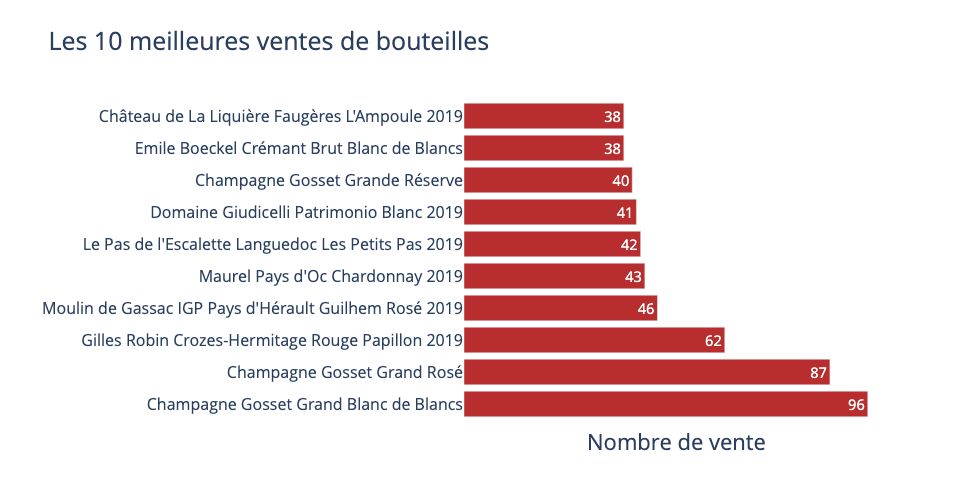

In [65]:
fig = px.bar(top_10_vente, x='total_sales', y='post_title', 
             labels={
                     "total_sales": "Nombre de vente",
                     "post_title": ""
                 },
             title="Les 10 meilleures ventes de bouteilles", 
             text_auto=True,
            color_discrete_sequence= [px.colors.qualitative.G10[8]],
            width=1200, height=500)

fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False)
fig.update_layout(plot_bgcolor = "white",
                  yaxis = dict(tickfont = dict(size=16)),
                 font=dict(size=18))
fig.update_xaxes(showticklabels=False)
    

fig.show()

## Les 10 meilleurs chiffres d'affaires

On regarde quelle bouteille rapporte le meilleur chiffre d'affaires

In [66]:
top_10_ca = data_erp_web_work.nlargest(10,['chiffre_affaire'])

top_10_ca = top_10_ca.drop(columns=['id_web','post_author','post_date_gmt','post_excerpt','post_name','post_modified_gmt','guid'])

top_10_ca

product_id  price  stock_quantity  total_sales  \
194        4334   49.0               0           96   
71         4144   49.0              11           87   
218        4402  176.0               8           13   
70         4142   53.0               8           30   
69         4141   39.0               1           40   
201        4355  126.5               2           11   
199        4352  225.0               0            5   
79         4153   29.0               0           36   
651        6206   25.2             120           41   
30         4068   16.6             157           62   

                                            post_title _merge  chiffre_affaire  
194             Champagne Gosset Grand Blanc de Blancs   both           4704.0  
71                         Champagne Gosset Grand Rosé   both           4263.0  
218                               Cognac Frapin VIP XO   both           2288.0  
70               Champagne Gosset Grand Millésime 2006   both           1590.0  
69                     Champagne Gosset Grande Réserve   both           1560.0  
201     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   both           1391.5  
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008   both           1125.0  
79    Elian Daros Côtes du Marmandais Clos Baquey 2015   both           1044.0  
651           Domaine Giudicelli Patrimonio Blanc 2019   both           1033.2  
30   Gilles Robin Crozes-Hermitage Rouge Papillon 2019   both           1029.2

On regarde ça avec un graphique.

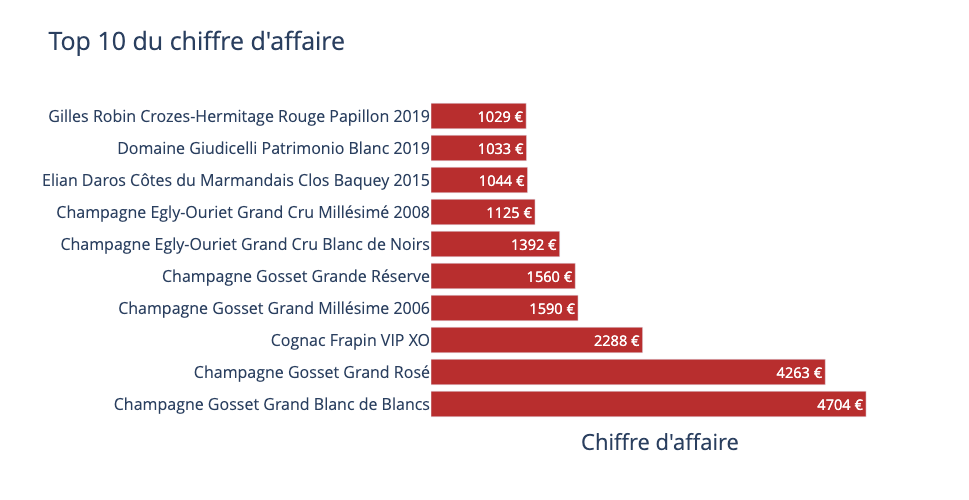

In [67]:


fig = px.bar(top_10_ca, x='chiffre_affaire', y='post_title', 
             labels={
                     "chiffre_affaire": "Chiffre d'affaire",
                     "post_title": ""
                 },
             title="Top 10 du chiffre d'affaire", 
             text_auto=True,
            color_discrete_sequence= [px.colors.qualitative.G10[8]],
            width=1200, height=500)

fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False,
                 texttemplate = "%{value:d} €")
                 
fig.update_layout(plot_bgcolor = "white",
                  yaxis = dict(tickfont = dict(size=16)),
                 font=dict(size=18))
fig.update_xaxes(showticklabels=False)
    

fig.show()

On retrouve les bouteilles suivantes dans les 2 classements.

In [68]:
top_10_ca.merge(top_10_vente, how='inner')

product_id  price  stock_quantity  total_sales  \
0        4334   49.0               0           96   
1        4144   49.0              11           87   
2        4141   39.0               1           40   
3        6206   25.2             120           41   
4        4068   16.6             157           62   

                                          post_title _merge  chiffre_affaire  
0             Champagne Gosset Grand Blanc de Blancs   both           4704.0  
1                        Champagne Gosset Grand Rosé   both           4263.0  
2                    Champagne Gosset Grande Réserve   both           1560.0  
3           Domaine Giudicelli Patrimonio Blanc 2019   both           1033.2  
4  Gilles Robin Crozes-Hermitage Rouge Papillon 2019   both           1029.2

# <a name="C8">Analyse sur le prix</a>

On va analyser de la dispersion de l'ensemble des prix des différentes bouteilles afin de détecter d'éventuelle anomalie.

--------------------
Prix
Moyenne :
 32.4282700421941
Médiane :
 23.4
Mode :
 0    19.0
Name: price, dtype: float64
Variance :
 773.6651501718035
Ecart type:
 27.814836871206047
Skewness :
 2.5898477052260658
Kurtosis :
 10.121004901959852


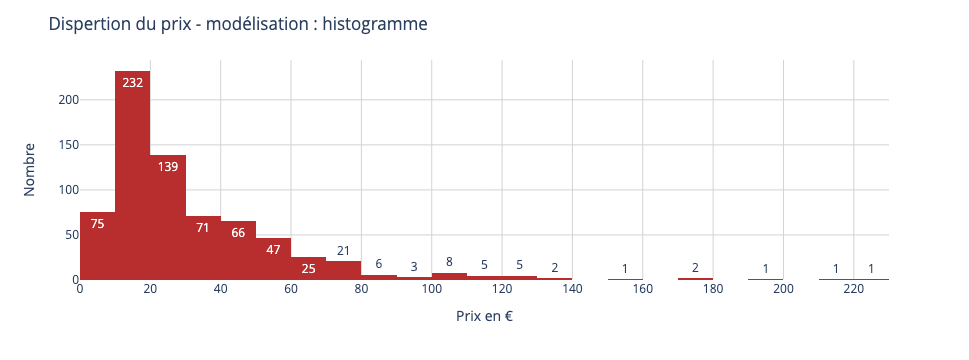

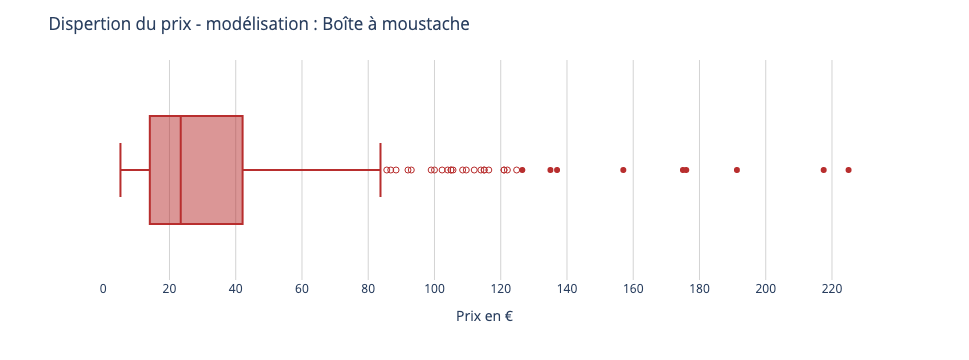

In [69]:
print("-"*20)
print("Prix")
print("Moyenne :\n",data_erp_web_work['price'].mean())
print("Médiane :\n",data_erp_web_work['price'].median())
print("Mode :\n",data_erp_web_work['price'].mode())
print("Variance :\n",data_erp_web_work['price'].var(ddof=0))
print("Ecart type:\n",data_erp_web_work['price'].std(ddof=0))
print("Skewness :\n",data_erp_web_work['price'].skew())
print("Kurtosis :\n",data_erp_web_work['price'].kurtosis())

####
# histogramme
fig_hyst = px.histogram(data_erp_web_work, x="price",nbins=30,
                        labels={"price": "Prix en € ",},
                         text_auto=True,
                        color_discrete_sequence= [px.colors.qualitative.G10[8]])

fig_hyst.update_layout(
    plot_bgcolor = "white",
    title="Dispertion du prix - modélisation : histogramme",
    xaxis_title="Prix en €",
    yaxis_title="Nombre")

fig_hyst.update_xaxes(tick0=0, dtick=20,showgrid=True, gridwidth=1,gridcolor='LightGrey')
fig_hyst.update_yaxes(tick0=0, dtick=50,showgrid=True, gridwidth=1,gridcolor='LightGrey')


fig_hyst.show()




####
# boite à moustache
fig_box_plot = px.box(data_erp_web_work, x="price", 
                      labels={"price": "Prix en € ",},
                        color_discrete_sequence= [px.colors.qualitative.G10[8]],
                     points = 'suspectedoutliers')

fig_box_plot.update_layout(
    plot_bgcolor = "white",
    title="Dispertion du prix - modélisation : Boîte à moustache")

fig_box_plot.update_xaxes(tick0=0, dtick=20,showgrid=True, gridwidth=1,gridcolor='LightGrey')


fig_box_plot.show()


On remarque qu'au-delà de 85 €, et la mobilisation par boîte de moustache nous informe que ses valeurs sont les Outlier. C'est-à-dire que le prix de ses bouteilles sont plus élevées que l'ensemble des prix.

0n rajoute le Z score de chaque prix dans le data frame, afin de savoir quel prix s'éloigne le plus de la moyenne.

In [70]:
data_erp_web_work["Z-score"] = st.zscore(data_erp_web_work['price'])

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/3092642920.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
data_erp_web_work.head()

product_id  price  stock_quantity id_web  total_sales  post_author  \
0        3847   24.2               0  15298            6            2   
1        3849   34.3               0  15296            0            2   
2        3850   20.8               0  15300            0            2   
3        4032   14.1               0  19814            3            2   
4        4039   46.0               0  19815            0            2   

        post_date_gmt                                         post_title  \
0 2018-02-08 11:58:52        Pierre Jean Villa Saint-Joseph Préface 2018   
1 2018-02-08 12:49:41    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
2 2018-02-08 13:08:36  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
3 2018-02-09 13:01:05  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
4 2018-02-12 08:04:37          Pierre Jean Villa Côte Rôtie Carmina 2017   

                                        post_excerpt  \
0  Il exhale un nez subtil, racé avec du poivre f...   
1  Les vieilles vignes lui apportent une rare pro...   
2  Dentelle de fruit de jeunes syrah, aux tanins ...   
3  Gamine représente tout le fruité et la gourman...   
4  Le côte rôtie Carmina monte en puissance mais ...   

                                           post_name   post_modified_gmt  \
0        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 08:30:29   
1          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 08:00:17   
2  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 16:15:03   
3                  pierre-jean-villa-igp-gamine-2018 2020-01-04 15:36:01   
4          pierre-jean-villa-cote-rotie-carmina-2017 2020-01-04 15:36:10   

                                                guid _merge  chiffre_affaire  \
0  https://www.bottle-neck.fr/?post_type=product&...   both            145.2   
1  https://www.bottle-neck.fr/?post_type=product&...   both              0.0   
2  https://www.bottle-neck.fr/?post_type=product&...   both              0.0   
3  https://www.bottle-neck.fr/?post_type=product&...   both             42.3   
4  https://www.bottle-neck.fr/?post_type=product&...   both              0.0   

    Z-score  
0 -0.295823  
1  0.067293  
2 -0.418060  
3 -0.658939  
4  0.487931

On prend les bouteilles qui ont un prix éloigné de plus de 2 fois de l'écart type. Voici un schéma qui résume la dispersion d'une loi normale.

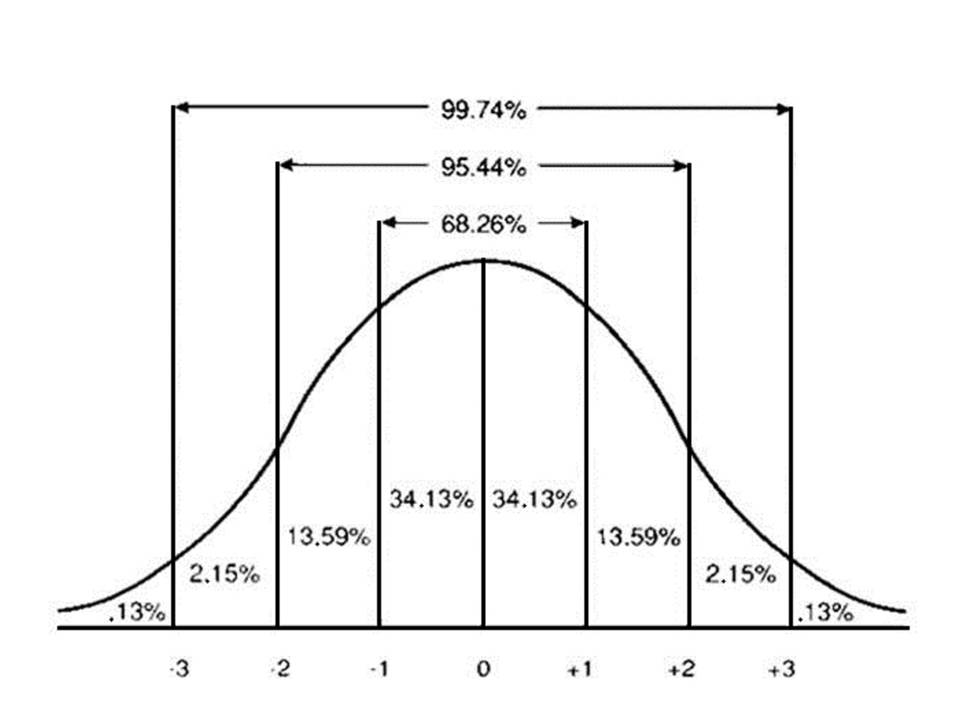

En abscisse, nous avons la moyenne, la valeur `0`, et l'éloignement de cette moyenne en nombre d'écarts-types. Nous voyons également le pourcentage de valeur contenu dans les intervalles.

Le calcul du Z score nous permet d'avoir l'éloignement en nombre d'écarts-types du point par rapport à la moyenne.

On regarde les prix des bouteilles éloignés d'au moins 2 écarts-types.

In [72]:
data_erp_web_work[data_erp_web_work["Z-score"]>=2]

product_id  price  stock_quantity id_web  total_sales  post_author  \
63         4115  100.0              11  15382            0            2   
65         4132   88.4               5  11668            0            2   
199        4352  225.0               0  15940            5            2   
201        4355  126.5               2  12589           11            2   
218        4402  176.0               8   3510           13            2   
219        4404  108.5               2   3507            2            2   
221        4406  157.0               3   7819            0            2   
222        4407  104.0               6   3509            1            2   
227        4582  109.6               7  12857            0            2   
380        4903  102.3              20  14805            0            2   
381        4904  137.0              13  14220            5            2   
426        5001  217.5              20  14581            0            2   
431        5007  105.0              17  12791            0            2   
432        5008  105.0              10  11602            0            2   
437        5025  112.0               0  13914            0            2   
502        5565   92.0               0  19822            0            2   
511        5612  124.8              12  14915            0            2   
553        5767  175.0              12  15185            0            2   
587        5892  191.3              10  14983            3            2   
602        5916   93.0               3  14774            0            2   
603        5917  122.0               4  14775            0            2   
604        5918  114.0               8  14773            0            2   
642        6126  135.0              10  14923            2            2   
647        6201  105.6               7  14596            0            2   
648        6202  116.4              14  15126            0            2   
653        6212  115.0               2  13996            2            2   
654        6213  121.0               7  15072            0            2   
655        6214   99.0               7  11601            0            2   
656        6215  115.0               4  12790            0            2   
657        6216  121.0               6  15070            0            2   

          post_date_gmt                                         post_title  \
63  2018-02-13 10:08:45  Zind-Humbrecht Riesling Grand Cru Rangen De Th...   
65  2018-02-13 10:43:55  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   
199 2018-03-02 09:30:04     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
201 2018-03-02 09:46:10     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
218 2018-03-22 10:21:05                               Cognac Frapin VIP XO   
219 2018-03-22 10:32:55              Cognac Frapin Château de Fontpinot XO   
221 2018-03-22 10:42:48  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
222 2018-03-22 10:49:53                          Cognac Frapin Cigar Blend   
227 2018-04-12 15:56:13  Château de Meursault Puligny-Montrachet 1er Cr...   
380 2018-05-15 08:10:57  Domaine Des Croix Corton Grand Cru Les Grèves ...   
381 2018-05-15 08:23:41  Domaine Des Croix Corton Charlemagne Grand Cru...   
426 2018-07-17 07:45:39     David Duband Charmes-Chambertin Grand Cru 2014   
431 2018-07-17 08:36:03  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
432 2018-07-17 08:52:41  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
437 2018-07-18 08:39:43  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
502 2018-11-26 09:59:10                      Tempier Bandol Cabassaou 2017   
511 2019-01-15 14:30:49  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
553 2019-03-13 13:43:22                Camille Giroud Clos de Vougeot 2016   
587 2019-03-28 09:21:36  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
602 2019-04-04 14:39:24  Wemyss Malts Single Cask Scotch Whisky Chocola...   
603 2019-04-04 14:49:37  Wemyss Malts Sin

On voit que sur ces bouteilles, il y a quand même vu certaines qui ont fait les ventes, donc le prix doit être correct pour le consommateur. On va maintenant s'intéresser à celles qui ont fait aucune vente. Voici la liste.

In [73]:
data_erp_web_work[(data_erp_web_work["Z-score"]>2) & (data_erp_web_work["total_sales"] == 0)]

product_id  price  stock_quantity id_web  total_sales  post_author  \
63         4115  100.0              11  15382            0            2   
65         4132   88.4               5  11668            0            2   
221        4406  157.0               3   7819            0            2   
227        4582  109.6               7  12857            0            2   
380        4903  102.3              20  14805            0            2   
426        5001  217.5              20  14581            0            2   
431        5007  105.0              17  12791            0            2   
432        5008  105.0              10  11602            0            2   
437        5025  112.0               0  13914            0            2   
502        5565   92.0               0  19822            0            2   
511        5612  124.8              12  14915            0            2   
553        5767  175.0              12  15185            0            2   
602        5916   93.0               3  14774            0            2   
603        5917  122.0               4  14775            0            2   
604        5918  114.0               8  14773            0            2   
647        6201  105.6               7  14596            0            2   
648        6202  116.4              14  15126            0            2   
654        6213  121.0               7  15072            0            2   
655        6214   99.0               7  11601            0            2   
656        6215  115.0               4  12790            0            2   
657        6216  121.0               6  15070            0            2   

          post_date_gmt                                         post_title  \
63  2018-02-13 10:08:45  Zind-Humbrecht Riesling Grand Cru Rangen De Th...   
65  2018-02-13 10:43:55  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   
221 2018-03-22 10:42:48  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
227 2018-04-12 15:56:13  Château de Meursault Puligny-Montrachet 1er Cr...   
380 2018-05-15 08:10:57  Domaine Des Croix Corton Grand Cru Les Grèves ...   
426 2018-07-17 07:45:39     David Duband Charmes-Chambertin Grand Cru 2014   
431 2018-07-17 08:36:03  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
432 2018-07-17 08:52:41  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
437 2018-07-18 08:39:43  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
502 2018-11-26 09:59:10                      Tempier Bandol Cabassaou 2017   
511 2019-01-15 14:30:49  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
553 2019-03-13 13:43:22                Camille Giroud Clos de Vougeot 2016   
602 2019-04-04 14:39:24  Wemyss Malts Single Cask Scotch Whisky Chocola...   
603 2019-04-04 14:49:37  Wemyss Malts Single Cask Scotch Whisky Choc 'n...   
604 2019-04-04 15:01:54  Wemyss Malts Single Cask Scotch Whisky Chai Ca...   
647 2019-07-23 08:37:14  David Duband Chambolle-Musigny 1er Cru Les Sen...   
648 2019-07-23 08:50:24  Domaine Clerget Echezeaux Grand Cru En Orveaux...   
654 2019-07-25 07:10:32  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
655 2019-07-25 07:15:41  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
656 2019-07-25 07:30:16  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
657 2019-07-25 07:31:09  Domaine des Comtes Lafon Volnay 1er Cru Champa...   

                                          post_excerpt  \
63   Le nez est puissant, dominant, riche, sur la f...   
65   Le nez dévoile déjà une belle intensité de fru...   
221  Eau-de-Vie distillée à partir de raisins de Gr...   
227  Il présente une grande fraîcheur minérale au n...   
380  Ce vin exhale de beaux arômes de fruits rouges...   
426  Robe cerise chatoyante. Un nez de fruits rouge...   
431  "Il s'agit là de la meilleure partie de l'appe...   
432  "Il s'agit là de la meilleure partie de l'appe...   
437  Une cuvée surprenante, par son amer articulé a...   
502  <div id="wrapper">\n<div id="container-wrapper...   

On peut faire une recherche sur le domaine où le château de la bouteille pour voir si les prix sont cohérents avec celle qui me font des ventes.

In [74]:
data_erp_web_work.loc[data_erp_web_work['post_title'].str.find("Domaine des Comtes Lafon Volna")==0]

product_id  price  stock_quantity id_web  total_sales  post_author  \
431        5007  105.0              17  12791            0            2   
432        5008  105.0              10  11602            0            2   
653        6212  115.0               2  13996            2            2   
654        6213  121.0               7  15072            0            2   
655        6214   99.0               7  11601            0            2   
656        6215  115.0               4  12790            0            2   
657        6216  121.0               6  15070            0            2   

          post_date_gmt                                         post_title  \
431 2018-07-17 08:36:03  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
432 2018-07-17 08:52:41  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
653 2019-07-25 07:09:17  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
654 2019-07-25 07:10:32  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
655 2019-07-25 07:15:41  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
656 2019-07-25 07:30:16  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
657 2019-07-25 07:31:09  Domaine des Comtes Lafon Volnay 1er Cru Champa...   

                                          post_excerpt  \
431  "Il s'agit là de la meilleure partie de l'appe...   
432  "Il s'agit là de la meilleure partie de l'appe...   
653  "Il s'agit là de la meilleure partie de l'appe...   
654  "Il s'agit là de la meilleure partie de l'appe...   
655  La couleur rouge intense annonce un belle conc...   
656  La couleur rouge intense annonce un belle conc...   
657  La couleur rouge intense annonce un belle conc...   

                                             post_name   post_modified_gmt  \
431  domaine-des-comtes-lafon-volnay-1er-cru-santen... 2020-07-02 07:30:03   
432  domaine-des-comtes-lafon-volnay-1er-cru-santen... 2020-06-23 13:35:02   
653  domaine-des-comtes-lafon-volnay-1er-cru-santen... 2020-06-16 07:30:16   
654  domaine-des-comtes-lafon-volnay-1er-cru-santen... 2020-06-25 07:30:06   
655  domaine-des-comtes-lafon-volnay-1er-cru-champa... 2020-07-04 09:35:02   
656  domaine-des-comtes-lafon-volnay-1er-cru-champa... 2019-11-04 08:30:25   
657  domaine-des-comtes-lafon-volnay-1er-cru-champa... 2020-07-30 07:30:08   

                                                  guid _merge  \
431  https://www.bottle-neck.fr/?post_type=product&...   both   
432  https://www.bottle-neck.fr/?post_type=product&...   both   
653  https://www.bottle-neck.fr/?post_type=product&...   both   
654  https://www.bottle-neck.fr/?post_type=product&...   both   
655  https://www.bottle-neck.fr/?post_type=product&...   both   
656  https://www.bottle-neck.fr/?post_type=product&...   both   
657  https://www.bottle-neck.fr/?post_type=product&...   both   

     chiffre_affaire   Z-score  
431              0.0  2.609101  
432              0.0  2.609101  
653            230.0  2.968622  
654              0.0  3.184334  
655              0.0  2.393389  
656              0.0  2.968622  
657              0.0  3.184334

On s'aperçoit qu'il y a des prix de bouteille qui sont plus élevés que la grande majorité de toutes les bouteilles. Est-ce qu'on peut en conclure que ce sont les valeurs aberrantes, peut-être pas ? 
Ce qu'il faudrait faire, c'est faire une segmentation par rapport :
- Au type d'alcool (vin rouge, vin blanc, rosé, spiritueux...) 
- à la région
- à l'année
- à la gamme de prix
afin de pouvoir comparer les prix par catégories et avoir un résultat un peu plus parlant.

# <a name="C9">Analyse du chiffre d'affaires</a>

On peut aussi effectuer une analyse sur le chiffre d'affaires. On va utiliser la courbe de Lorentz pour mettre en avant les inégalités. 

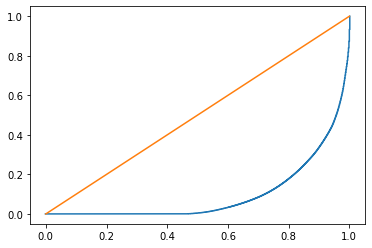

Coefficient de Gini :  0.8043042599364256


In [75]:
chiffre_affaire = data_erp_web_work['chiffre_affaire']
n = len(chiffre_affaire)
lorenz = np.cumsum(np.sort(chiffre_affaire)) / chiffre_affaire.sum()
lorenz = np.append([0],lorenz)

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) 
plt.show()




AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
print("Coefficient de Gini : ", gini )

On peut se percevoir qu'il y a 50 % des bouteilles qui ne font aucun chiffre d'affaires. 

Maintenant la question que l'on peut se poser, est-ce que les bouteilles qui ne font aucun chiffre d'affaires sont en stock ou pas ? 

On va refaire cette même courbe en prenant que les bouteilles en stock ou les bouteilles qui ont généré du chiffre d'affaires.

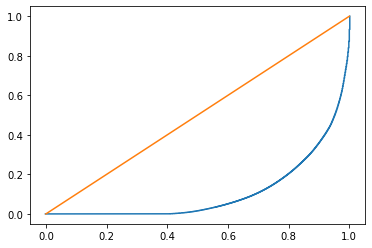

Coefficient de Gini :  0.7822540357039103


In [76]:
df = data_erp_web_work[(data_erp_web_work['stock_quantity'] > 0) | (data_erp_web_work['chiffre_affaire'] > 0)]

chiffre_affaire_bouteille_en_stock = df['chiffre_affaire']
n = len(chiffre_affaire_bouteille_en_stock)
lorenz = np.cumsum(np.sort(chiffre_affaire_bouteille_en_stock)) / chiffre_affaire_bouteille_en_stock.sum()
lorenz = np.append([0],lorenz)

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) 
plt.show()

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S

print("Coefficient de Gini : ", gini )

L'allure globale de la courbe est très similaire. Le résultat est peut-être meilleur, mais il y a quand même 40 % des bouteilles **en stock** qui ne génère aucun chiffre d'affaires.

Que faut-il faire de ces bouteilles ?

#  <a name="C10"> Étude complémentaire </a>

On a vu qu'avec la modélisation de la dispersion du prix avec la boîte à moustache au-delà de 85 euros les valeurs étaient considérés comme des valeurs aberrantes par le modèle. Ici, on verra ça dans le détail.


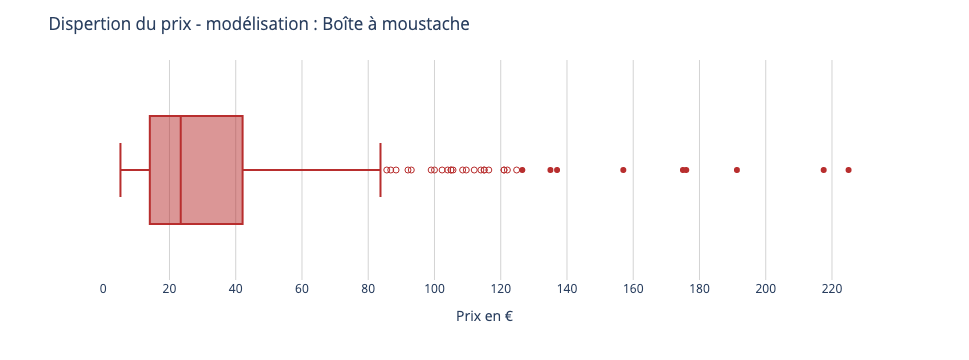

In [77]:
# boite à moustache
fig_box_plot = px.box(data_erp_web_work, x="price", 
                      labels={"price": "Prix en € ",},
                        color_discrete_sequence= [px.colors.qualitative.G10[8]],
                     points = 'suspectedoutliers')

fig_box_plot.update_layout(
    plot_bgcolor = "white",
    title="Dispertion du prix - modélisation : Boîte à moustache")

fig_box_plot.update_xaxes(tick0=0, dtick=20,showgrid=True, gridwidth=1,gridcolor='LightGrey')


fig_box_plot.show()

On peut utiliser le Z-score pour visualiser les outliers. 

Pour ça, il suffit de calculer le Z-score pour chaque valeur de prix et si le-Z score est supérieur à deux alors la valeur est considéré comme outlier.

C'est ce que l'on va faire ici, je crée deux data-frames :
- un qui va contenir les bouteilles avec un Z-score inférieur à 2, 
- et un autre, les bouteilles avec un Z-score supérieur ou égale à 2.

In [117]:
data_prix_outlier = data_erp_web_work[data_erp_web_work["Z-score"]>=2]
data_prix_95_pourcent = data_erp_web_work[data_erp_web_work["Z-score"]<2]

On peut le représenter maintenant sous forme de graphique avec en ordonnée le prix et en abscisse l'index de la bouteille. Ce qui nous donne une vue d'ensemble de tous les prix.

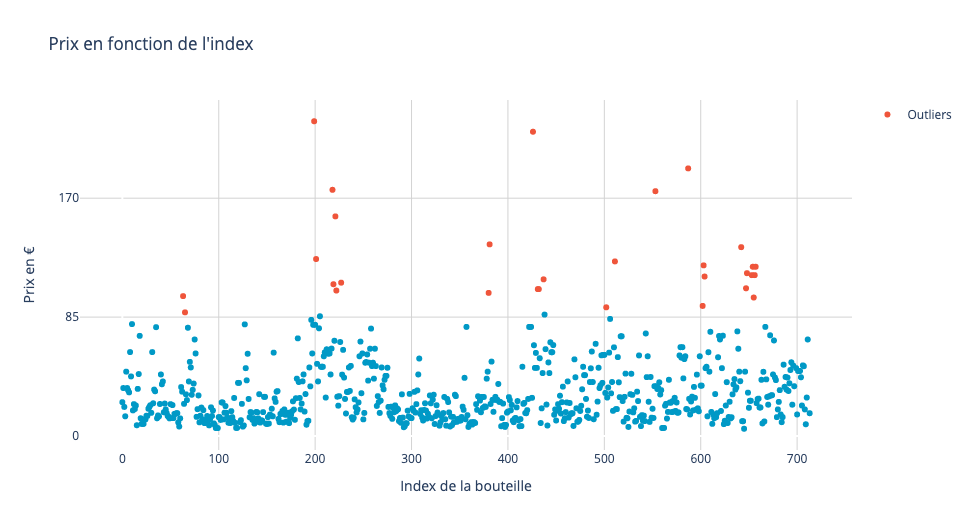

In [122]:
fig = px.scatter(x=data_prix_95_pourcent['price'].index, y=data_prix_95_pourcent['price'].values, title="Prix en fonction de l'index",
                 labels={
                    "y": "Prix en €",
                     "x":"Index de la bouteille"
                 },
                color_discrete_sequence= [px.colors.qualitative.G10[5]],
                height=530)
fig.add_scatter(x=data_prix_outlier['price'].index, y=data_prix_outlier['price'].values,
                mode='markers', name="Outliers")

fig.update_layout(
    plot_bgcolor = "white")

fig.update_xaxes(tick0=0, dtick=100,showgrid=True, gridwidth=1,gridcolor='LightGrey')
fig.update_yaxes(tick0=0, dtick=85,showgrid=True, gridwidth=1,gridcolor='LightGrey')

    
fig.show()

Sur le graphique ci-dessus, on a tracé une ligne horizontale à 85 €. Les outliers sont tous au-dessus de cette ligne. Ce qui prouve qu'au-delà de 85 € environ, le Z-score considère également les prix comme des outliers. 

Remarque : il y a quand même des différences entre les différentes modélisations pour obtenir les outliers. Sur le graphique, on peut voir que l'on a deux bouteilles légèrement supérieures à 85 € et pas considéré comme mon client.

Pour la suite de l'étude, on prendra la modélisation du Z score.

## Liste des bouteilles ayant un prix « aberrant »
 
On peut afficher maintenant la liste des bouteilles au prix soi-disant "Outlier", en affichant seulement les bouteille avec Z-score sur le prix supérieurs ou égale à 2.

In [124]:
# On supprime les colonnes inutiles.
data_prix_outlier = data_prix_outlier.drop(columns=['post_author', 'post_date_gmt','post_name','post_modified_gmt','guid','_merge']) 

# on affiche le data Frame
data_prix_outlier

product_id  price  stock_quantity id_web  total_sales  \
63         4115  100.0              11  15382            0   
65         4132   88.4               5  11668            0   
199        4352  225.0               0  15940            5   
201        4355  126.5               2  12589           11   
218        4402  176.0               8   3510           13   
219        4404  108.5               2   3507            2   
221        4406  157.0               3   7819            0   
222        4407  104.0               6   3509            1   
227        4582  109.6               7  12857            0   
380        4903  102.3              20  14805            0   
381        4904  137.0              13  14220            5   
426        5001  217.5              20  14581            0   
431        5007  105.0              17  12791            0   
432        5008  105.0              10  11602            0   
437        5025  112.0               0  13914            0   
502        5565   92.0               0  19822            0   
511        5612  124.8              12  14915            0   
553        5767  175.0              12  15185            0   
587        5892  191.3              10  14983            3   
602        5916   93.0               3  14774            0   
603        5917  122.0               4  14775            0   
604        5918  114.0               8  14773            0   
642        6126  135.0              10  14923            2   
647        6201  105.6               7  14596            0   
648        6202  116.4              14  15126            0   
653        6212  115.0               2  13996            2   
654        6213  121.0               7  15072            0   
655        6214   99.0               7  11601            0   
656        6215  115.0               4  12790            0   
657        6216  121.0               6  15070            0   

                                            post_title  \
63   Zind-Humbrecht Riesling Grand Cru Rangen De Th...   
65   Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
201     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
218                               Cognac Frapin VIP XO   
219              Cognac Frapin Château de Fontpinot XO   
221  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
222                          Cognac Frapin Cigar Blend   
227  Château de Meursault Puligny-Montrachet 1er Cr...   
380  Domaine Des Croix Corton Grand Cru Les Grèves ...   
381  Domaine Des Croix Corton Charlemagne Grand Cru...   
426     David Duband Charmes-Chambertin Grand Cru 2014   
431  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
432  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
437  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
502                      Tempier Bandol Cabassaou 2017   
511  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
553                Camille Giroud Clos de Vougeot 2016   
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
602  Wemyss Malts Single Cask Scotch Whisky Chocola...   
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...   
604  Wemyss Malts Single Cask Scotch Whisky Chai Ca...   
642             Champagne Gosset Célébris Vintage 2007   
647  David Duband Chambolle-Musigny 1er Cru Les Sen...   
648  Domaine Clerget Echezeaux Grand Cru En Orveaux...   
653  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
654  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
655  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
656  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
657  Domaine des Comtes Lafon Volnay 1er Cru Champa...   

                                          post_excerpt  chiffre_affaire  \
63   Le nez est puissant, dominant, riche, sur la f...              0.0   
65   Le nez dévoile déjà une belle intensité de fru...              0.0   
199  Issu d’un assemblage de 70% de Pinot Noir du g...    



On compte le nombre de bouteille.

In [80]:
nb_outlier =  data_prix_outlier.shape[0]
pourcent_outlier = round(data_prix_outlier.shape[0] * 100 /data_erp_web_work.shape[0],2)

print("Il y a ",nb_outlier," outliers sur la variable prix, soit ",pourcent_outlier," %")

Il y a  30  outliers sur la variable prix, soit  4.22  %


## Ces bouteilles ont-elles un prix « aberrant » ?

On a vu que l'on avait 30 bouteilles considérées comme des outliers. Sur ces bouteilles certaines réalisent des ventes et d'autres non.

Sur les bouteilles qui ont réalisé des ventes, s'il y avait une erreur de saisie sur le prix, je pense que le consommateur se serait rendu compte, surtout à ce prix-là et il n'aurait pas acheté.

Après une comparaison des prix de ces bouteilles et du prix affiché par les concurrents, on s'aperçoit que les prix de ses bouteilles ne sont pas aberrants.

C'est juste un segment de catégorie de bouteille « Premium ». On va les identifier comme tel dans un nouveau data frame.

In [125]:

# Supression des colonnes inutiles
data_bouteille_segment = data_erp_web_work.drop(
    columns=['post_author', 'post_date_gmt','post_name','post_modified_gmt','guid','_merge'])

# création et renseignement de la nouvelle colonne
data_bouteille_segment['segment'] = 'Standard'
data_bouteille_segment['segment'][data_bouteille_segment['Z-score']>=2] = 'Premium'

data_bouteille_segment

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/3090311047.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



product_id  price  stock_quantity id_web  total_sales  \
0          3847   24.2               0  15298            6   
1          3849   34.3               0  15296            0   
2          3850   20.8               0  15300            0   
3          4032   14.1               0  19814            3   
4          4039   46.0               0  19815            0   
..          ...    ...             ...    ...          ...   
708        6928   19.0              20  15741            2   
709        6930    8.4              83  16135            5   
710        7023   27.5              15  15891            0   
711        7025   69.0               2  15887            0   
713        7338   16.3              45  16230            0   

                                            post_title  \
0          Pierre Jean Villa Saint-Joseph Préface 2018   
1      Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
2    Pierre Jean Villa Crozes-Hermitage Accroche Co...   
3    Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
4            Pierre Jean Villa Côte Rôtie Carmina 2017   
..                                                 ...   
708          Le Cèdre de Jean Faure Saint-Emilion 2016   
709   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015   
710         Camin Larredya Jurançon Sec La Virada 2018   
711     Domaine Jamet Côte Rôtie Fructus Voluptas 2018   
713  Domaine Saint-Nicolas Vin de France Blanc Les ...   

                                          post_excerpt  chiffre_affaire  \
0    Il exhale un nez subtil, racé avec du poivre f...            145.2   
1    Les vieilles vignes lui apportent une rare pro...              0.0   
2    Dentelle de fruit de jeunes syrah, aux tanins ...              0.0   
3    Gamine représente tout le fruité et la gourman...             42.3   
4    Le côte rôtie Carmina monte en puissance mais ...              0.0   
..                                                 ...              ...   
708  Un nez ouvert  sur un velouté de fruits rouges...             38.0   
709  Belle robe jeune à dominante rubis soutenue. N...             42.0   
710  L'exotisme du nez est complété par d'élégantes...              0.0   
711  Pour cette cuvée, Jean-Paul Jamet recherche un...              0.0   
713  Issu d'un assemblage de chenin blanc et de cha...              0.0   

      Z-score   segment  
0   -0.295823  Standard  
1    0.067293  Standard  
2   -0.418060  Standard  
3   -0.658939  Standard  
4    0.487931  Standard  
..        ...       ...  
708 -0.482774  Standard  
709 -0.863865  Standard  
710 -0.177181  Standard  
711  1.314828  Standard  
713 -0.579844  Standard  

[711 rows x 10 columns]

On fait un comparatif sur la variable prix des 2 segments

Voici le descriptif pour le segment « Standard »

In [186]:
data_bouteille_segment.loc[data_bouteille_segment['segment']=='Standard','price'].describe()

count    681.000000
mean      28.256388
std       18.470292
min        5.200000
25%       13.700000
50%       22.800000
75%       39.000000
max       86.800000
Name: price, dtype: float64

Voici le descriptif pour le segment « Premium »

In [187]:
data_bouteille_segment.loc[data_bouteille_segment['segment']=='Premium','price'].describe()

count     30.0000
mean     127.1300
std       35.8097
min       88.4000
25%      105.0000
50%      115.0000
75%      132.8750
max      225.0000
Name: price, dtype: float64

On remarque que : 
- le segment « Standard » à un prix moyen de 28 € avec un écart type de 18 €
- le segment « Premium » à un prix moyen de 127 € avec un écart type de 36 €


## Chiffre d'affaires en fonctions des segments

Maintenant que l'on a identifié que l'on avait des gammes standard et des gammes premium, qu'en est-il sur les ventes et le chiffre d'affaires ?

Voici un graphique représentant le chiffre d'affaires effectuées pour chaque bouteille en fonction de son prix.

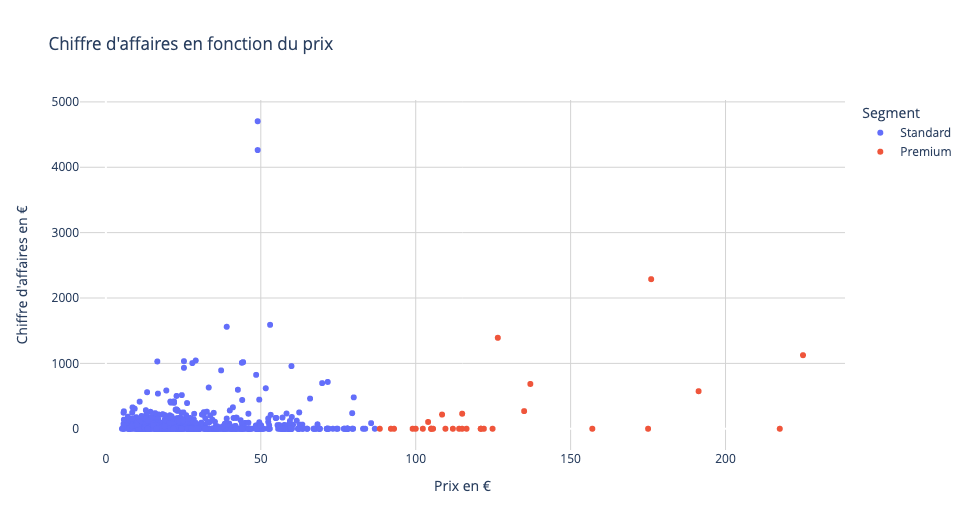

In [193]:
fig = px.scatter(data_bouteille_segment,x='price', y='chiffre_affaire', title="Chiffre d'affaires en fonction du prix",
                 color='segment',
                 labels={
                     "chiffre_affaire": "Chiffre d'affaires en €",
                    "price": "Prix en €",
                     "segment":"Segment"
                 },
                height=530)

fig.update_layout(
    plot_bgcolor = "white")

fig.update_xaxes(tick0=0, dtick=50,showgrid=True, gridwidth=1,gridcolor='LightGrey')
fig.update_yaxes(tick0=0, dtick=1000,showgrid=True, gridwidth=1,gridcolor='LightGrey')
fig.show()

En regardant le graphique, on peut s'apercevoir de deux choses : 
- La première, c'est que vers les 50 €, deux bouteilles qui performent en termes de chiffre d'affaires par rapport au reste des bouteilles. 
- La deuxième chose, les outliers génère du chiffre d'affaires également

On verra chaque cas dans le détail.

### Premier cas : les 2 bouteilles à 49 € qui performent

Pour le premier cas, voici les bouteilles concernés :

In [131]:
data_bouteille_segment[data_bouteille_segment['chiffre_affaire']>4000]

product_id  price  stock_quantity id_web  total_sales  \
71         4144   49.0              11   1662           87   
194        4334   49.0               0   7818           96   

                                 post_title  \
71              Champagne Gosset Grand Rosé   
194  Champagne Gosset Grand Blanc de Blancs   

                                          post_excerpt  chiffre_affaire  \
71   Le nez exprime sans détour la fraise, dans sa ...           4263.0   
194  La bulle fine et presente se dirige vers la su...           4704.0   

      Z-score   segment  
71   0.595787  Standard  
194  0.595787  Standard

Ce sont deux bouteilles de champagne Gosset.

On va calculer le chiffre d'affaires et le pourcentage que ça représente fait seulement par ces deux bouteilles.

In [194]:
ca = data_bouteille_segment['chiffre_affaire'][data_bouteille_segment['chiffre_affaire']>4000].sum()
pourcent = round(ca * 100 / ca_global,2)

print("Chiffre d'affaires de ces 2 bouteilles : ",ca," €, soit ", pourcent," % du chiffre d'affaires globale")


Chiffre d'affaires de ces 2 bouteilles :  8967.0  €, soit  12.71  % du chiffre d'affaires globale


Ce n'est pas négligeable comme pourcentage. C'est un produit qui se vend. 

Je vous conseille de le garder dans le catalogue évidemment et de le mettre en avant.

On fait une recherche pour voir s'il y a d'autres produits du type champagne Gosset et voici ce que l'on obtient.

In [133]:
data_bouteille_segment[data_bouteille_segment['post_title'].str.contains("champagne Gosset", case=False)]

product_id  price  stock_quantity id_web  total_sales  \
69         4141   39.0               1    304           40   
70         4142   53.0               8  11641           30   
71         4144   49.0              11   1662           87   
194        4334   49.0               0   7818           96   
642        6126  135.0              10  14923            2   

                                 post_title  \
69          Champagne Gosset Grande Réserve   
70    Champagne Gosset Grand Millésime 2006   
71              Champagne Gosset Grand Rosé   
194  Champagne Gosset Grand Blanc de Blancs   
642  Champagne Gosset Célébris Vintage 2007   

                                          post_excerpt  chiffre_affaire  \
69   Le nez, ouvert et expressif, évoque les fruits...           1560.0   
70   L'attaque est ample, gourmande avec une belle ...           1590.0   
71   Le nez exprime sans détour la fraise, dans sa ...           4263.0   
194  La bulle fine et presente se dirige vers la su...           4704.0   
642  Une robe somptueuse a la teinte jaune pâle eti...            270.0   

      Z-score   segment  
69   0.236267  Standard  
70   0.739596  Standard  
71   0.595787  Standard  
194  0.595787  Standard  
642  3.687662   Premium

On a cinq références au catalogue pour le champagne Gosset, dont une considérée comme Premium. 

Si l'on regarde dans le détail cette dernière, on peut voir  que les clients l'achètent et qu'elle est au prix du marché. 
(vendu à environ 135 € HT par nos concurrents)

### Second cas : les bouteilles « Premium » qui se vendent

Maintenant, on va s'intéresser aux bouteilles « Premium ».

Voici les bouteilles Premium qui se vendent.

In [135]:
data_bouteille_segment[(data_bouteille_segment['total_sales']>0)&(data_bouteille_segment['segment']=='Premium')]

product_id  price  stock_quantity id_web  total_sales  \
199        4352  225.0               0  15940            5   
201        4355  126.5               2  12589           11   
218        4402  176.0               8   3510           13   
219        4404  108.5               2   3507            2   
222        4407  104.0               6   3509            1   
381        4904  137.0              13  14220            5   
587        5892  191.3              10  14983            3   
642        6126  135.0              10  14923            2   
653        6212  115.0               2  13996            2   

                                            post_title  \
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
201     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
218                               Cognac Frapin VIP XO   
219              Cognac Frapin Château de Fontpinot XO   
222                          Cognac Frapin Cigar Blend   
381  Domaine Des Croix Corton Charlemagne Grand Cru...   
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
642             Champagne Gosset Célébris Vintage 2007   
653  Domaine des Comtes Lafon Volnay 1er Cru Santen...   

                                          post_excerpt  chiffre_affaire  \
199  Issu d’un assemblage de 70% de Pinot Noir du g...           1125.0   
201  Le Blanc de Noirs représente le meilleur du sa...           1391.5   
218  La cuvée VIP XO à été enrichie d’eaux-de-vie t...           2288.0   
219  Exclusivement vendangé, distillé, vieilli et m...            217.0   
222  Ce cognac bénéficie d'un vieillissement plus l...            104.0   
381  Ce Corton Charlemagne éblouit par son assise, ...            685.0   
587  Cet Ambonnay évoque les grands Pinots Noirs de...            573.9   
642  Une robe somptueuse a la teinte jaune pâle eti...            270.0   
653  "Il s'agit là de la meilleure partie de l'appe...            230.0   

      Z-score  segment  
199  6.923346  Premium  
201  3.382070  Premium  
218  5.161696  Premium  
219  2.734934  Premium  
222  2.573149  Premium  
381  3.759567  Premium  
587  5.711762  Premium  
642  3.687662  Premium  
653  2.968622  Premium

Si l'on résume ce tableau, on a :

In [143]:
nb_vente_premium = data_bouteille_segment[(data_bouteille_segment['total_sales']>0)&
                                          (data_bouteille_segment['segment']=='Premium')].shape[0]
pourcent_vente_premium = nb_vente_premium * 100 / data_bouteille_segment[data_bouteille_segment['segment']=='Premium'].shape[0]
ca_vente_premium = data_bouteille_segment.loc[data_bouteille_segment['segment'] == 'Premium','chiffre_affaire' ].sum()
pourcent_ca_vente_premium = round(ca_vente_premium * 100 /ca_global,2)

print("Il a ", nb_vente_premium,
      " boutielles avec un prix supérieur à la normale qui se vendent, soit ",pourcent_vente_premium," % des reférences Premium.")
print("Cela représente ",ca_vente_premium," € de chiffre d'affaires soit ", pourcent_ca_vente_premium," % du chiffre d'affaires global.")

Il a  9  boutielles avec un prix supérieur à la normale qui se vendent, soit  30.0  % des reférences Premium.
Cela représente  6884.4  € de chiffre d'affaires soit  9.76  % du chiffre d'affaires global.


Sur ces neuf références, on réalise quand même presque 10 % du chiffre d'affaires global. 

Ce sont des bouteilles à garder au catalogue et optimiser leurs ventes. La question que l'on peut se poser pourquoi il n'y a que 30 % des références qui se vendent ?

Sur cet échantillon de bouteille « Premium », on va faire un petit comparatif de ce qui se vend et ce qui ne se vend pas.

On va rajouter une colonne catégorie sur notre data frame

In [153]:
# Création du data frame Premium
data_bouteille_premium = data_bouteille_segment[data_bouteille_segment['segment']=='Premium']
# Création d'une colonne catégorie et on met tout à la valeur 'Vin'
data_bouteille_premium['categorie'] = 'Vin'

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/3276864185.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
# Modification des catégories 
data_bouteille_premium['categorie'][data_bouteille_premium['post_title'].str.contains("champagne", case=False)]= "Champagne"
data_bouteille_premium['categorie'][data_bouteille_premium['post_title'].str.contains("cognac", case=False)]= "Cognac"
data_bouteille_premium['categorie'][data_bouteille_premium['post_title'].str.contains("Whisky", case=False)]= "Whisky"

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/3050377819.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/3050377819.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/f2lzkbw53cnf0z498bjm75tc0000gn/T/ipykernel_7380/3050377819.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
data_bouteille_premium

product_id  price  stock_quantity id_web  total_sales  \
63         4115  100.0              11  15382            0   
65         4132   88.4               5  11668            0   
199        4352  225.0               0  15940            5   
201        4355  126.5               2  12589           11   
218        4402  176.0               8   3510           13   
219        4404  108.5               2   3507            2   
221        4406  157.0               3   7819            0   
222        4407  104.0               6   3509            1   
227        4582  109.6               7  12857            0   
380        4903  102.3              20  14805            0   
381        4904  137.0              13  14220            5   
426        5001  217.5              20  14581            0   
431        5007  105.0              17  12791            0   
432        5008  105.0              10  11602            0   
437        5025  112.0               0  13914            0   
502        5565   92.0               0  19822            0   
511        5612  124.8              12  14915            0   
553        5767  175.0              12  15185            0   
587        5892  191.3              10  14983            3   
602        5916   93.0               3  14774            0   
603        5917  122.0               4  14775            0   
604        5918  114.0               8  14773            0   
642        6126  135.0              10  14923            2   
647        6201  105.6               7  14596            0   
648        6202  116.4              14  15126            0   
653        6212  115.0               2  13996            2   
654        6213  121.0               7  15072            0   
655        6214   99.0               7  11601            0   
656        6215  115.0               4  12790            0   
657        6216  121.0               6  15070            0   

                                            post_title  \
63   Zind-Humbrecht Riesling Grand Cru Rangen De Th...   
65   Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
201     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
218                               Cognac Frapin VIP XO   
219              Cognac Frapin Château de Fontpinot XO   
221  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
222                          Cognac Frapin Cigar Blend   
227  Château de Meursault Puligny-Montrachet 1er Cr...   
380  Domaine Des Croix Corton Grand Cru Les Grèves ...   
381  Domaine Des Croix Corton Charlemagne Grand Cru...   
426     David Duband Charmes-Chambertin Grand Cru 2014   
431  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
432  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
437  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
502                      Tempier Bandol Cabassaou 2017   
511  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
553                Camille Giroud Clos de Vougeot 2016   
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
602  Wemyss Malts Single Cask Scotch Whisky Chocola...   
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...   
604  Wemyss Malts Single Cask Scotch Whisky Chai Ca...   
642             Champagne Gosset Célébris Vintage 2007   
647  David Duband Chambolle-Musigny 1er Cru Les Sen...   
648  Domaine Clerget Echezeaux Grand Cru En Orveaux...   
653  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
654  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
655  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
656  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
657  Domaine des Comtes Lafon Volnay 1er Cru Champa...   

                                          post_excerpt  chiffre_affaire  \
63   Le nez est puissant, dominant, riche, sur la f...              0.0   
65   Le nez dévoile déjà une belle intensité de fru...              0.0   
199  Issu d’un assemblage de 70% de Pinot Noir du g...    

Une fois que l'on a identifié les différentes catégories des bouteilles, on peut créer un tableau par catégories.

In [156]:
data_bouteille_premium_catégorie = data_bouteille_premium.groupby('categorie').sum()
data_bouteille_premium_catégorie = data_bouteille_premium_catégorie.drop(columns=['product_id','price','Z-score'])
data_bouteille_premium_catégorie

stock_quantity  total_sales  chiffre_affaire
categorie                                              
Champagne              12           18           2786.5
Cognac                 19           16           2609.0
Vin                   184           10           1488.9
Whisky                 15            0              0.0

On le met sous forme de graphique.

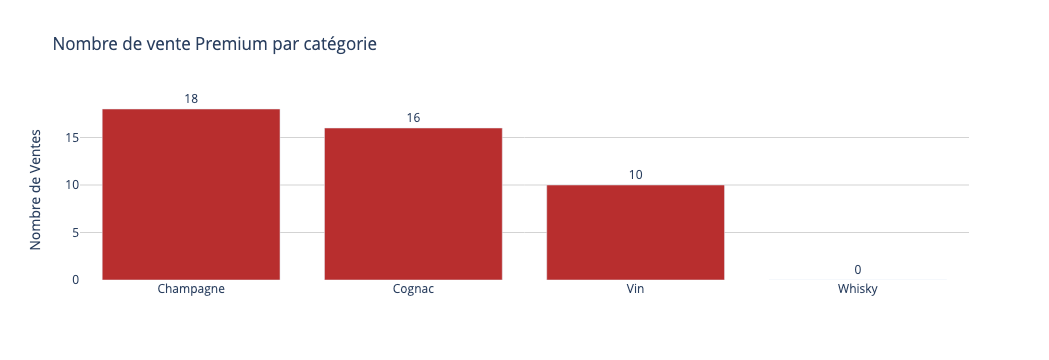

In [170]:
fig = px.bar(data_bouteille_premium_catégorie, y='total_sales', title='Nombre de vente Premium par catégorie',
             labels ={
                 'total_sales':'Nombre de Ventes',
                 'categorie':''
             },text_auto=True,
            color_discrete_sequence= [px.colors.qualitative.G10[8]])

fig.update_layout(
    plot_bgcolor = "white",
 yaxis = dict(tickfont = dict(size=12)),
                 font=dict(size=12))

fig.update_yaxes(tick0=0, dtick=5,showgrid=True, gridwidth=1,gridcolor='LightGrey')



fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


fig.show()

La première chose qui saute aux yeux sur ce graphique, c'est qu'il n'y a aucune vente de faite par la catégorie whisky. On va regarder si c'est le cas pour toutes les bouteilles de type whisky.

In [171]:
data_bouteille_segment[data_bouteille_segment['post_title'].str.contains('whisky', case = False)]

product_id  price  stock_quantity id_web  total_sales  \
206        4364   49.5               6  11585            1   
207        4391   49.5               7  11467            0   
208        4392   49.5              13  11586            0   
209        4393   57.0               2  13765            0   
210        4394   59.8               0  13766            0   
211        4395   27.5               8  11587            0   
212        4396   62.0               7   9636            0   
213        4397   59.0               7  12639            0   
214        4398   59.0               0  12641            0   
215        4399   59.0               6  12640            1   
599        5912   57.0               8  15227            0   
602        5916   93.0               3  14774            0   
603        5917  122.0               4  14775            0   
604        5918  114.0               8  14773            0   

                                            post_title  \
206   Wemyss Malts Blended Malt Scotch Whisky The Hive   
207  Wemyss Malts Blended Malt Scotch Whisky Peat C...   
208  Wemyss Malts Blended Malt Scotch Whisky Spice ...   
209  Wemyss Malts Blended Malt Scotch Whisky Vanill...   
210  Wemyss Malts Blended Malt Scotch Whisky Treacl...   
211      Wemyss Malts Blended Scotch Whisky Lord Elcho   
212  Wemyss Malts Blended Malt Scotch Whisky The Hi...   
213  Wemyss Malts Blended Malt Scotch Whisky The Hi...   
214  Wemyss Malts Blended Malt Scotch Whisky Peat C...   
215  Wemyss Malts Blended Malt Scotch Whisky Spice ...   
599   Kingsbarns Distillery Lowland Single Malt Whisky   
602  Wemyss Malts Single Cask Scotch Whisky Chocola...   
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...   
604  Wemyss Malts Single Cask Scotch Whisky Chai Ca...   

                                          post_excerpt  chiffre_affaire  \
206  Le whisky Wemyss The Hive "La Ruche" est un as...             49.5   
207  Le whisky Wemyss Peat Chimney "La Cheminée à T...              0.0   
208  Le Spice King "Roi des Epices" révèle un nez d...              0.0   
209  Nouveau Blended malt proposé par la maison Wem...              0.0   
210  Vieilli en fût de Sherry, le Treacle Chest (li...              0.0   
211  Un Whisky frais et vif. Le nez évoque une sala...              0.0   
212  The Hive est un assemblage de malts du Speysid...              0.0   
213  Ce Blended Malts en Batch Strength est très lé...              0.0   
214  Ce Blended Malts en Batch Strength est très lé...              0.0   
215  Ce Blended Malts en Batch Strength est très lé...             59.0   
599  <span title="">Dream to Dram, un caractère rem...              0.0   
602  305 bouteilles, 13 ans d'âge.\n\n<span title="...              0.0   
603  710 bouteilles, 17 ans d'âge.\n\n<span title="...              0.0   
604  644 bouteilles - 16 ans d'âge.\n\nNez très élé...              0.0   

      Z-score   segment categorie  
206  0.613763  Standard    Whisky  
207  0.613763  Standard    Whisky  
208  0.613763  Standard    Whisky  
209  0.883404  Standard    Whisky  
210  0.984069  Standard    Whisky  
211 -0.177181  Standard    Whisky  
212  1.063164  Standard    Whisky  
213  0.955308  Standard    Whisky  
214  0.955308  Standard    Whisky  
215  0.955308  Standard    Whisky  
599  0.883404  Standard    Whisky  
602  2.177677   Premium    Whisky  
603  3.220286   Premium    Whisky  
604  2.932670   Premium    Whisky

On peut voir que le whisky se vend très mal, seulement deux bouteilles de vendu sur les 14 références pour un chiffre d'affaires à peine supérieur à 100 €.

Je pense que le whisky est un produit un peu hors sujet par rapport au site de vente en ligne de vin. Le consommateur n'a pas le réflexe de se dire, je vais sur un site de vente de vin pour acheter du whisky.

On pourrait résoudre ce problème en communiquant à notre base client, ou en améliorant le SEO. Par ailleurs, on peut tout simplement essayer de se concentrer sur ce qui fonctionne le mieux aussi.


Pour chaque catégorie « premium », on va rajouter le nombre de références au catalogue et le nombre de références qui se vendent.

In [172]:


data_bouteille_premium_catégorie['Nb_ref'] = data_bouteille_premium.groupby('categorie').size()
data_bouteille_premium_catégorie['Nb_ref_vendu'] = data_bouteille_premium[data_bouteille_premium['total_sales']>0].groupby('categorie').size()

data_bouteille_premium_catégorie

stock_quantity  total_sales  chiffre_affaire  Nb_ref  Nb_ref_vendu
categorie                                                                    
Champagne              12           18           2786.5       4           3.0
Cognac                 19           16           2609.0       4           3.0
Vin                   184           10           1488.9      19           3.0
Whisky                 15            0              0.0       3           NaN

In [173]:
#on remplace la valeur NaN par 0

data_bouteille_premium_catégorie['Nb_ref_vendu'] = data_bouteille_premium_catégorie['Nb_ref_vendu'].fillna(0)
data_bouteille_premium_catégorie

stock_quantity  total_sales  chiffre_affaire  Nb_ref  Nb_ref_vendu
categorie                                                                    
Champagne              12           18           2786.5       4           3.0
Cognac                 19           16           2609.0       4           3.0
Vin                   184           10           1488.9      19           3.0
Whisky                 15            0              0.0       3           0.0

Maintenant que l'on a ce tableau, on va pouvoir connaître le pourcentage de références vendues en fonction du nombre de références.

In [174]:
data_bouteille_premium_catégorie['pourcentage_ref_vendu'] = round(
    data_bouteille_premium_catégorie['Nb_ref_vendu'] *100 / data_bouteille_premium_catégorie['Nb_ref'],2)
data_bouteille_premium_catégorie

stock_quantity  total_sales  chiffre_affaire  Nb_ref  Nb_ref_vendu  \
categorie                                                                       
Champagne              12           18           2786.5       4           3.0   
Cognac                 19           16           2609.0       4           3.0   
Vin                   184           10           1488.9      19           3.0   
Whisky                 15            0              0.0       3           0.0   

           pourcentage_ref_vendu  
categorie                         
Champagne                  75.00  
Cognac                     75.00  
Vin                        15.79  
Whisky                      0.00

On visualise ça avec un graphique.

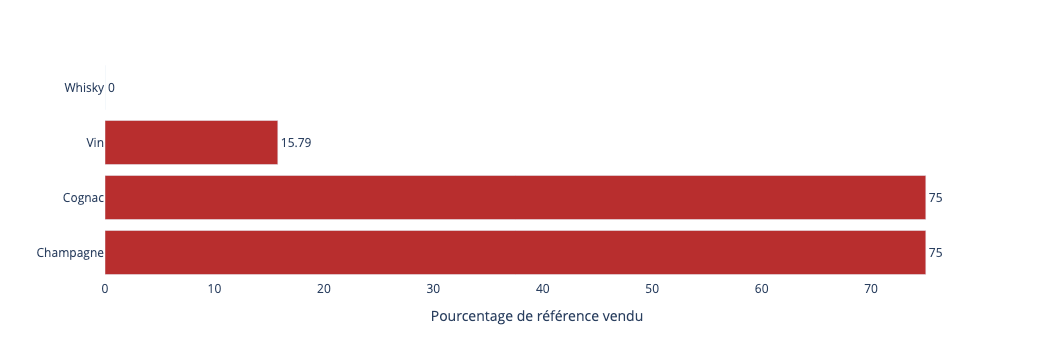

In [177]:
fig = px.bar(data_bouteille_premium_catégorie, x = 'pourcentage_ref_vendu',
            labels={
                'pourcentage_ref_vendu':"Pourcentage de référence vendu",
                'categorie':''
            },
             text_auto=True,
            color_discrete_sequence= [px.colors.qualitative.G10[8]])
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    plot_bgcolor = "white",
 yaxis = dict(tickfont = dict(size=12)),
                 font=dict(size=12))


fig.show()

On commence à remarquer quelque chose d'intéressant sur la catégorie vin. On voit que pour le cognac et le champagne les trois quarts des références se vendent alors que sur le vin, on est plutôt sur une sur six.

On regarde ce que ça donne avec le chiffre d'affaires.

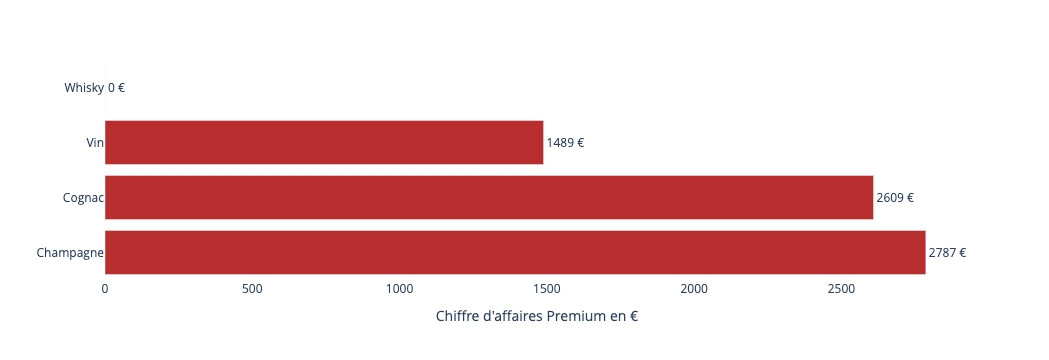

In [181]:
fig = px.bar(data_bouteille_premium_catégorie, x = 'chiffre_affaire',
            labels={
                'chiffre_affaire':"Chiffre d'affaires Premium en €",
                'categorie':''
            },
             text_auto=True,
            color_discrete_sequence= [px.colors.qualitative.G10[8]])
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False, texttemplate = "%{value:d} €")

fig.update_layout(
    plot_bgcolor = "white",
 yaxis = dict(tickfont = dict(size=12)),
                 font=dict(size=12))
fig.show()


Avec ces graphiques, on peut s'apercevoir d'une chose : c'est que si l'on compare les ventes de cognac et de champagne « Premium » avec celle des vins « Premium ». On s'aperçoit que le vin a des résultats très inférieurs par rapport au cognac et au champagne.

Pourquoi ? 

Je pense que le client a peut-être peur que le vin s'abime dans le transport par des changements de température ou des chocs. Qu'il ait la mauvaise surprise de vin abîmé à l'ouverture de sa bouteille. Phénomène que l'on a moins sur du cognac ou du champagne.

Une des solutions serait de communiquer sur le service de livraison du vin, À fin de rassurer le client sur :
- les variations de température, 
- les vols
- et les chocs

# <a name="C11">Résumé</a>

Le chiffre d'affaires global est de 70 568 €.

Il y a deux bouteilles de champagne Gosset qui performe en termes de chiffre d'affaires. Elles font 8 967 € de chiffre d'affaires (soit 12 % du chiffre d'affaires global) pour un prix unitaire de 49 €. Le champagne Gosset est vraiment une valeur sûre du catalogue, il faut donc le mettre en avant dans le marketing et la communication.

Les prix des bouteilles, considérés aberrants par les modélisations, sont des bouteilles appartenant à une gamme « Premium ». Leurs prix ne sont pas aberrants par rapport au prix de la concurrence. On peut ainsi diviser toutes les références de bouteille en deux segments : « Standard » et « Premium ».

Le segment « premium » génère 6 884 € de chiffre d'affaires soit presque 10 % du chiffre d'affaires global. Il faut aussi se concentrer sur ce segment pour augmenter son chiffre d'affaires.

Pour augmenter le chiffre d'affaires du segment premium, on a catégorisé et les bouteilles en fonction de leur type d'alcool. Ainsi, on a remarqué deux choses :

1.  Les whiskys se vendent mal. Seulement 2 bouteilles ont été vendues pour un chiffre d'affaires d'environ 100 € sur les 14 références du catalogue. Je pense que le whisky rentre peu dans la ligne éditoriale du site Web de vente de vin. Il faudrait : 
- Soit augmenter la visibilité de ses bouteilles avec du SEO, par exemple, ou de la communication auprès de nos clients, 
- Soit enlever ses bouteilles du catalogue et se concentrer sur ce qu'il fonctionne mieux.


2. Les ventes de vin « Premium » sont moins performantes que celle du champagne et du cognac. Ils  génèrent 1 489 € de chiffre d'affaires alors que le champagne et le cognac « Premium » génère plus de 2 500 € chacun, alors qu'il y a 5 fois plus de référence pour le vin « Premium ». Le client craint d'acheter du vin « Premium » et qu'il s'abîme lors du transport par des variations de température ou des chocs. On pourrait communiquer sur notre transport de qualité prévu pour éviter les variations de température, les chocs et les vols.
